# How has the Arab Spring Affected Different Economies across the MENA Region?

Principal Investigators: Mohannad Alramlawi - Zeyad Dahab

Emails: ma4402@nyu.edu - zmd221@nyu.edu

The Arab spring has caused a lot of instability within the MENA region. This is expected, considering that the series of revolts led to changes in the political, economic, and social dynamics of the countries that were directly affected by the Arab spring, and even those that were not. This project will focus on the economic effects of the Arab Spring on different countries in the MENA region. In order to study those effects, several variables will be utilized, including GDP, Total Investment, Inflation, Volume of Exports, Unemployment Rate, and Foreign Debt. Those variables will be analyzed between the years 2004 and 2018, paying special attention to the year 2011 (when the Arab spring started). 

First, a series of graphs -each with the variable "year" on the x-axis and the different economic indicators listed above on the y-axis- will be generated for the region as a whole. This would give us a general overview of the entire region. Then, the same graphs will be generated, only this time each country will be explored separately. We will first start with the countries that experienced revolts, including Egypt, Tunisia, and Libya. Afterwards, we will look at the countries that were indirectly affected by the Arab Spring, including Saudi Arabia, Jordan, and Lebanon.

Different methods of visualization will be used throughout the project, including graphing and mapping wherever possible.

## Importing data

This section imports the data and assigns it to a pandas dataframe.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [121]:
url = "/Users/Ramlawi/Desktop/DB_DATA.xlsx"

In [122]:
data = pd.read_excel(url)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 21 columns):
Country                          168 non-null object
Subject Descriptor               168 non-null object
Units                            168 non-null object
Scale                            21 non-null object
Country/Series-specific Notes    139 non-null object
2004                             139 non-null object
2005                             139 non-null object
2006                             139 non-null object
2007                             139 non-null object
2008                             139 non-null object
2009                             139 non-null object
2010                             139 non-null object
2011                             139 non-null object
2012                             139 non-null object
2013                             139 non-null object
2014                             139 non-null object
2015                             139 non-null ob

In [124]:
data.head(5)

Country                                 Subject Descriptor  \
0  Algeria            Gross domestic product, constant prices   
1  Algeria  Gross domestic product per capita, constant pr...   
2  Algeria                                   Total investment   
3  Algeria                             Gross national savings   
4  Algeria                 Inflation, average consumer prices   

                                               Units  Scale  \
0                                     Percent change    NaN   
1  Purchasing power parity; 2011 international do...  Units   
2                                     Percent of GDP    NaN   
3                                     Percent of GDP    NaN   
4                                              Index    NaN   

                       Country/Series-specific Notes     2004     2005  \
0  See notes for:  Gross domestic product, consta...      4.3      5.9   
1  See notes for:  Gross domestic product, consta...  11977.7  12495.6   
2  Source: National Statistics Office Latest actu...   33.305   31.334   
3  Source: National Statistics Office Latest actu...   46.333   51.861   
4  Source: National Statistics Office Latest actu...   109.95   111.47   

      2006     2007     2008          ...              2010     2011     2012  \
0    1.684    3.373     2.36          ...             3.616    2.823    3.391   
1  12517.1  12745.6  12769.9          ...           12929.2  13026.7  13188.9   
2   29.837   34.294   37.349          ...            42.328   38.572   41.301   
3   54.575   56.964   57.494          ...            49.869    48.46    47.18   
4   114.05   118.24   123.98          ...            136.23   142.36  155.053   

      2013     2014     2015     2016     2017     2018 Estimates Start After  
0      2.8      3.8      3.7      3.2      1.4    2.059                2017.0  
1  13274.3  13490.9  13692.8  13828.9  13725.1  13724.5                2017.0  
2   44.978   47.511   52.857   53.949   50.929   48.876                2017.0  
3   45.376   43.098   36.416   37.416    37.75   39.777                2017.0  
4    160.1   164.77  172.653  183.699   193.97  202.253                2017.0  

[5 rows x 21 columns]

In [125]:
data.tail(5)

Country                       Subject Descriptor  \
163   Yemen                   Gross national savings   
164   Yemen       Inflation, average consumer prices   
165   Yemen  Volume of exports of goods and services   
166   Yemen                        Unemployment rate   
167   Yemen              General government net debt   

                            Units Scale  \
163                Percent of GDP   NaN   
164                         Index   NaN   
165                Percent change   NaN   
166  Percent of total labor force   NaN   
167                Percent of GDP   NaN   

                         Country/Series-specific Notes     2004     2005  \
163  Source: IMF Staff Estimates Latest actual data...   21.901   22.311   
164  Source: National Statistics Office. Central Ba...  156.607  172.059   
165  Base year: 2005 Primary domestic currency: Yem...   -9.004   -2.029   
166                                                NaN      NaN      NaN   
167  See notes for:  General government net debt (N...   45.466   37.065   

        2006     2007     2008          ...              2010     2011  \
163   17.598   10.227   10.766          ...              8.25      2.5   
164  190.719  205.795  244.847          ...           282.212  337.367   
165   -3.882  -10.774   -2.586          ...             6.907  -18.208   
166      NaN      NaN      NaN          ...               NaN      NaN   
167   32.999   35.236   31.422          ...            38.275    42.34   

        2012     2013     2014     2015     2016     2017     2018  \
163    6.993    5.033    7.105   -4.412   -1.366    1.956    5.084   
164  370.716  411.378  444.944  498.322  435.717  543.184  770.088   
165  -12.883     4.33    7.902   -35.25  -69.287  -13.983    0.242   
166      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
167   45.276   46.712   47.788   54.059    67.06   75.339   62.562   

    Estimates Start After  
163                2017.0  
164                2017.0  
165                   NaN  
166                   NaN  
167                2017.0  

[5 rows x 21 columns]

## Cleaning data

As it can be seen from the tables above, there are some cells and entire rows with NaN values. This is because some countries have missing data. 

In this section, we deal with this problem by eliminating the indicators that are not reported for most countries. We also eliminate the data for Syria and Somalia, since both countries have a lot of missing values.

In [126]:
data.rename(columns={'Subject Descriptor':'Subject'}, inplace=True)

In [127]:
data.drop( data[ data['Subject'] == "Unemployment rate" ].index , inplace=True)

In [128]:
data.drop( data[ data['Subject'] == "General government net debt" ].index , inplace=True)

In [129]:
data.drop( data[ data['Subject'] == "Total investment" ].index , inplace=True)

In [130]:
data.drop( data[ data['Country'] == "Syria" ].index , inplace=True)

In [131]:
data.drop( data[ data['Country'] == "Somalia" ].index , inplace=True)

In [132]:
data.head(5)

Country                                            Subject  \
0  Algeria            Gross domestic product, constant prices   
1  Algeria  Gross domestic product per capita, constant pr...   
3  Algeria                             Gross national savings   
4  Algeria                 Inflation, average consumer prices   
5  Algeria            Volume of exports of goods and services   

                                               Units  Scale  \
0                                     Percent change    NaN   
1  Purchasing power parity; 2011 international do...  Units   
3                                     Percent of GDP    NaN   
4                                              Index    NaN   
5                                     Percent change    NaN   

                       Country/Series-specific Notes     2004     2005  \
0  See notes for:  Gross domestic product, consta...      4.3      5.9   
1  See notes for:  Gross domestic product, consta...  11977.7  12495.6   
3  Source: National Statistics Office Latest actu...   46.333   51.861   
4  Source: National Statistics Office Latest actu...   109.95   111.47   
5  Source: Central Bank Latest actual data: 2017 ...    2.729    4.954   

      2006     2007     2008          ...              2010     2011     2012  \
0    1.684    3.373     2.36          ...             3.616    2.823    3.391   
1  12517.1  12745.6  12769.9          ...           12929.2  13026.7  13188.9   
3   54.575   56.964   57.494          ...            49.869    48.46    47.18   
4   114.05   118.24   123.98          ...            136.23   142.36  155.053   
5   -3.007   -1.882   -3.568          ...            -3.218   -4.822   -3.652   

      2013     2014     2015     2016     2017     2018 Estimates Start After  
0      2.8      3.8      3.7      3.2      1.4    2.059                2017.0  
1  13274.3  13490.9  13692.8  13828.9  13725.1  13724.5                2017.0  
3   45.376   43.098   36.416   37.416    37.75   39.777                2017.0  
4    160.1   164.77  172.653  183.699   193.97  202.253                2017.0  
5   -6.394    0.311    5.733    9.612   -4.895   -9.393                2017.0  

[5 rows x 21 columns]

## Visualizations for the entire Middle East region

We start off the project by looking at the Middle East region as a whole. 

We do not have values for the indicators of the entire region. Because that is the case, we will calculate those values by aggregating the values for each indicator over all the countries in the dataset.

### Aggregating the indicators

We aggregate the indicators by calculating the mean of each indicator for every year over the different countries we have.

This is done below.

We start by creating a different dataframe for each indicator:

In [133]:
gdp = data[data['Subject'] == "Gross domestic product, constant prices"]

In [134]:
gdp_capita = data[data['Subject'] == "Gross domestic product per capita, constant prices"]

In [135]:
gns = data[data['Subject'] == "Gross national savings"]

In [136]:
gns.drop( gns[ gns['Country'] == "Libya" ].index , inplace=True)

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Libya is dropped from the gross national savings dataframe because it does not have data for this indicator.

In [137]:
inf = data[data['Subject'] == "Inflation, average consumer prices"]

In [138]:
exp = data[data['Subject'] == "Volume of exports of goods and services"]

In [139]:
exp.drop( exp[ exp['Country'] == "Iraq" ].index , inplace=True)

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Iraq is dropped from the exports dataframe because it does not have data for this indicator.

In this next step, we create one dataframe that has the aggregated values for each indicator over time.

In [140]:
ME_df = pd.DataFrame({2004: [gdp.loc[:, 2004].mean(), gdp_capita.loc[:, 2004].mean(), gns.loc[:, 2004].mean(), inf.loc[:, 2004].mean(), exp.loc[:, 2004].mean()]})

In [141]:
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [142]:
x=1
for number in years:
    ME_df.insert(x, number, [gdp.loc[:, number].mean(), gdp_capita.loc[:, number].mean(), gns.loc[:, number].mean(), inf.loc[:, number].mean(), exp.loc[:, number].mean()], True)
    x = x + 1

In [143]:
ME_df['Economic Indicator'] = ["GDP", "GDP/capita", "GNS", "Inflation", "Exports"]

This is the dataframe we get:

In [144]:
ME_df.set_index('Economic Indicator')

2004          2005          2006          2007  \
Economic Indicator                                                           
GDP                     8.956316      5.617789      7.284684      5.889632   
GDP/capita          29064.483579  28820.365000  29004.904211  28390.535421   
GNS                    27.259056     30.848389     32.693278     32.809389   
Inflation              88.859789     93.759947    100.049105    108.212368   
Exports                 9.837944      6.791500      6.281056      6.788944   

                            2008          2009          2010          2011  \
Economic Indicator                                                           
GDP                     5.547895      1.970421      4.784895     -0.194316   
GDP/capita          27142.672368  26808.417316  27687.198316  28004.275421   
GNS                    34.328778     27.184833     29.943722     30.782056   
Inflation             119.229842    123.769053    130.150316    140.116000   
Exports                 5.643944     -4.118667      6.394833     -2.492278   

                            2012          2013          2014          2015  \
Economic Indicator                                                           
GDP                     9.420579      1.637895      0.140368      0.926000   
GDP/capita          28750.331000  27958.569842  26999.719947  26596.360474   
GNS                    29.130778     28.647222     26.114167     20.742500   
Inflation             150.701737    162.064895    174.648211    186.224000   
Exports                10.054222      4.022722     -1.265667      4.241000   

                            2016          2017          2018  
Economic Indicator                                            
GDP                     2.523158      4.568316      2.437684  
GDP/capita          26359.465842  26109.991684  26046.531789  
GNS                    21.242389     21.574056     23.291722  
Inflation             194.405000    220.924789    272.196421  
Exports                -3.179111      5.170944      3.278944

### Plotting the aggregated values

Now that we have the dataframe with all the aggregated values, all we have to do is to do is plot them.

This is done below:

In [145]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [146]:
def regionalplot(indicator):
    fig, ax = plt.subplots(figsize = (14,8))
    
    years_1 = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
    
    d = {"GDP": 0, "GDP/capita": 1, "GNS": 2, "Inflation": 3, "Exports": 4}
    
    for element in d:
        if element == indicator:
            m = d[element]
    
    a = ME_df.loc[m]
    a = a.tolist()
    del a[-1]
    
    ax.plot(years_1, a, color = "orange", linewidth = 3)
    
    ax.set_title("%s over time (for the entire region)"%indicator, loc ='center', fontsize = 28, fontweight = "bold", fontname = "Arial", color = "navy")
    ax.set_xlabel("Year", fontsize = 20, fontname = "Arial", color = "navy")
    if indicator == "GDP" or indicator == "Exports":
        ax.set_ylabel("%s (percent change)"%indicator, fontsize = 20, fontname = "Arial", color = "navy")
    elif indicator == "GDP/capita":
        ax.set_ylabel("%s (2011 international dollars)"%indicator, fontsize = 20, fontname = "Arial", color = "navy")
    elif indicator == "GNS":
        ax.set_ylabel("%s (as a percentage of GDP)"%indicator, fontsize = 20, fontname = "Arial", color = "navy")
    elif indicator == "Inflation":
        ax.set_ylabel("%s (index)"%indicator, fontsize = 20, fontname = "Arial", color = "navy")
        
    ax.grid(which='major', linestyle='-', linewidth='0.4', color='blue')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
    
    plt.axvline(x=2011, color='red', linestyle='-')
    plt.text(0.51, 0.97, 'Arab Spring starts', transform=ax.transAxes, rotation = 90, color = "red", fontsize =13)
    
    if indicator == "GDP" or indicator == "Exports":
        plt.axhline(y=0, color='black', linestyle='-')
    
    plt.show()

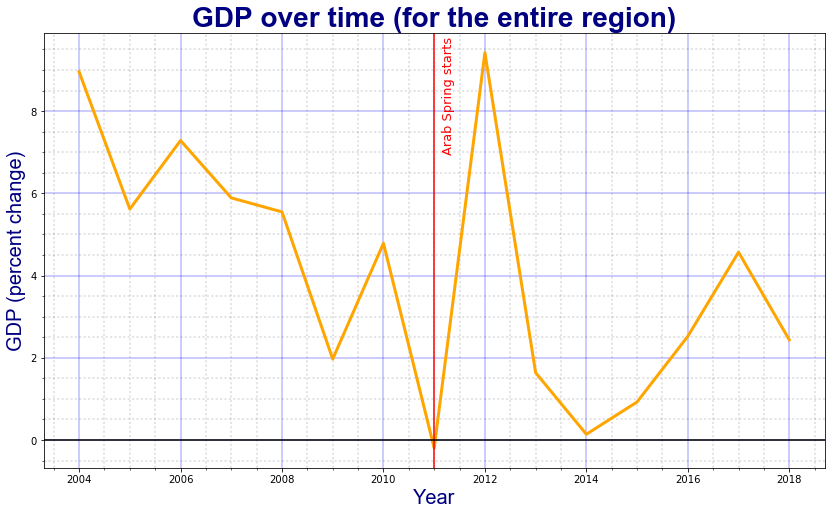

In [147]:
regionalplot("GDP")

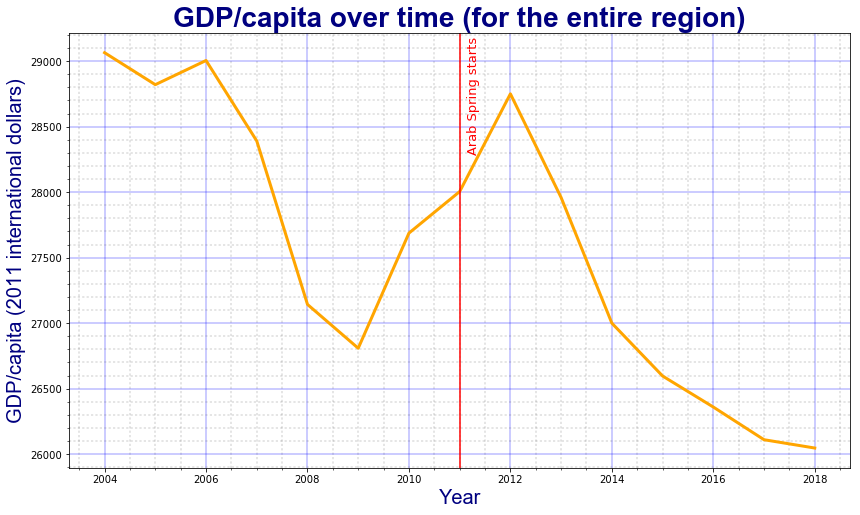

In [148]:
regionalplot("GDP/capita")

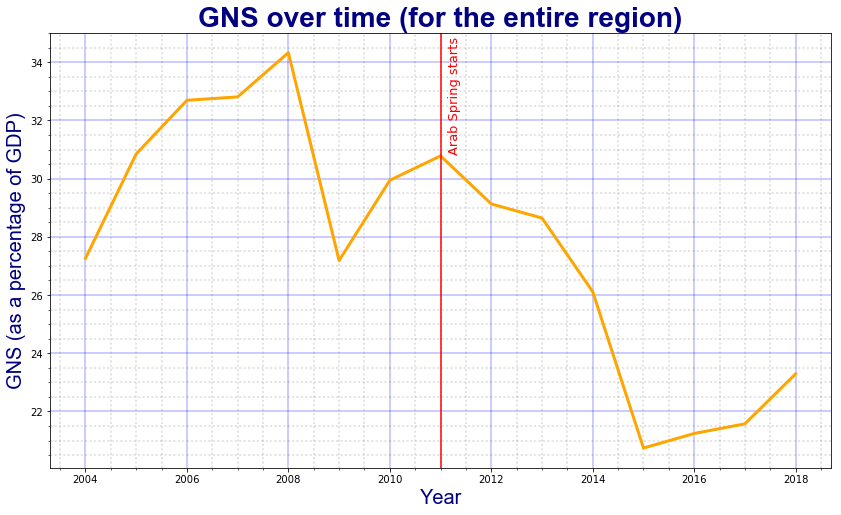

In [149]:
regionalplot("GNS")

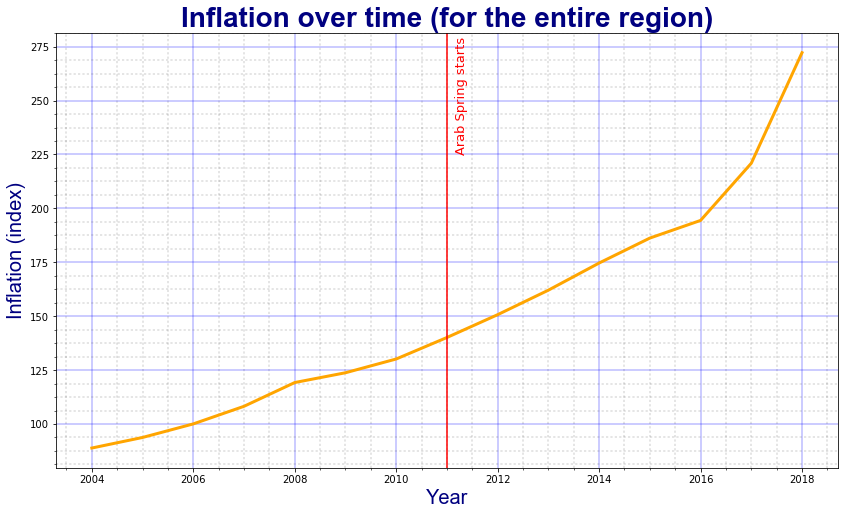

In [150]:
regionalplot("Inflation")

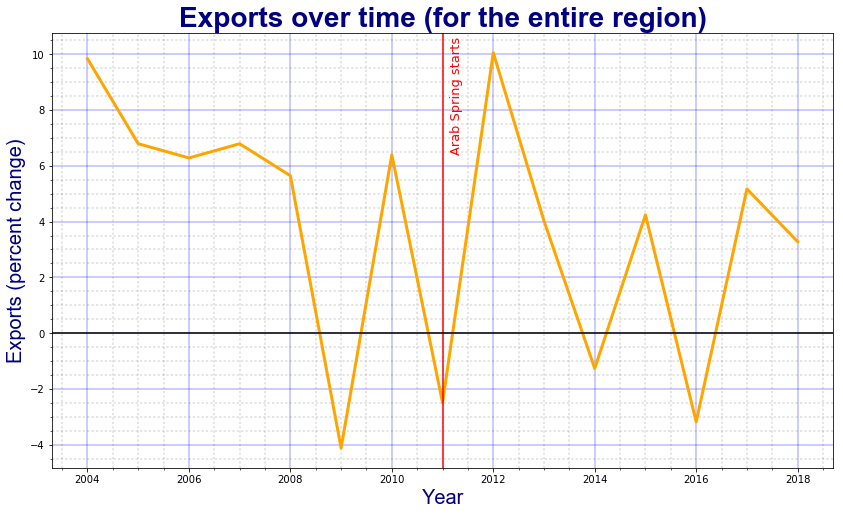

In [151]:
regionalplot("Exports")

#### Comments on the graphs:

GDP: Interestingly, it seems that the percentage change in GDP is almost always positive in the region except in 2011, the year when the Arab Spring started.

GDP/capita: The GDP/capita faces a decrease after 2012. There is a fall of almost 3000 dollars from 2004 till 2018.

GNS: It is striking to see that GNS starts making up a lower and lower percentage of GDP after the Arab Spring started in 2011.

Inflation: Inflation level is constantly increasing. Nothing is particularly special about the year 2011.

Exports: Constant fluctuation in the percentage change of exports. Nothing is particularly special about the year 2011.

## Mapping

As it can be seen, the graphs above are very interesting. They also give us valuable information. One problem however is that those graphs are for the MENA region as a whole. This is problematic, as countries in the Middle East are very diverse. 

In this section, we aim to generate a map of the Middle East, and color code each country based on the indicators we have. The aim of the mapping is to show how different each indicator will be for each country, and therefore prove the necessity to make seperate graphs for each country.

Mapping comprises of two main parts. First, for each country, we have to calculate the average of each indicator across years. This is important as mapping does not show changes over time like graphs do. We then use that data to generate the maps. 

In [152]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

!pip install census
from census import Census

!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

!pip install descartes
from descartes import PolygonPatch

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [153]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/geopandas/plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


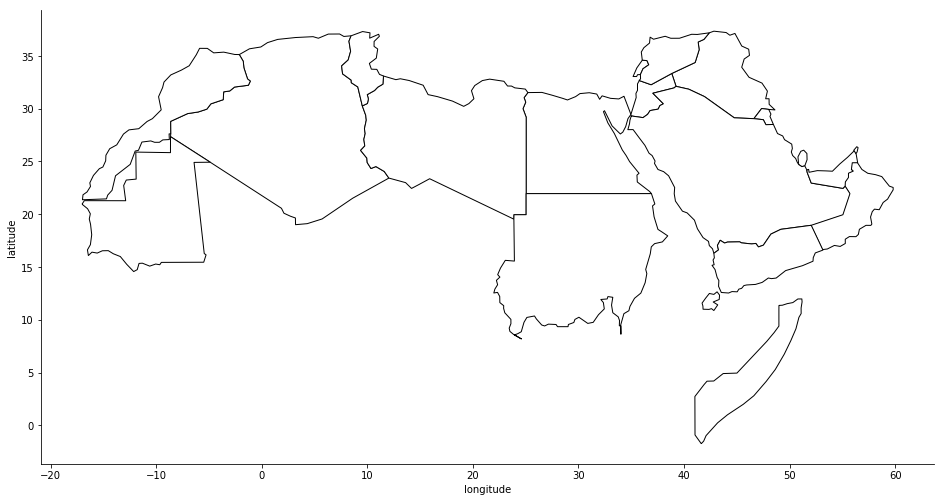

In [154]:
fig, gax = plt.subplots(figsize=(16,20))

countries = data.Country.unique()
countries = countries.tolist()

for item in countries:
    world[world['name'] == item].plot(ax = gax, edgecolor='black',color='white')
world[world['name'] == 'Syria'].plot(ax = gax, edgecolor='black',color='white')
world[world['name'] == 'Somalia'].plot(ax = gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

### Calculating the average across years for each indicator, for each country

In [155]:
gdp['Average GDP'] = (gdp[2004] + gdp[2005] + gdp[2006] + gdp[2007] + gdp[2008] + gdp[2009] + gdp[2010] + gdp[2011] + gdp[2012] + gdp[2013] + gdp[2014] + gdp[2015] + gdp[2016] + gdp[2017] + gdp[2018])/15

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [156]:
gdp_capita['Average GDP/capita'] = (gdp_capita[2004] + gdp_capita[2005] + gdp_capita[2006] + gdp_capita[2007] + gdp_capita[2008] + gdp_capita[2009] + gdp_capita[2010] + gdp_capita[2011] + gdp_capita[2012] + gdp_capita[2013] + gdp_capita[2014] + gdp_capita[2015] + gdp_capita[2016] + gdp_capita[2017] + gdp_capita[2018])/15

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [157]:
gns['Average GNS'] = (gns[2004] + gns[2005] + gns[2006] + gns[2007] + gns[2008] + gns[2009] + gns[2010] + gns[2011] + gns[2012] + gns[2013] + gns[2014] + gns[2015] + gns[2016] + gns[2017] + gns[2018])/15

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [158]:
inf['Average Inflation'] = (inf[2004] + inf[2005] + inf[2006] + inf[2007] + inf[2008] + inf[2009] + inf[2010] + inf[2011] + inf[2012] + inf[2013] + inf[2014] + inf[2015] + inf[2016] + inf[2017] + inf[2018])/15

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [159]:
exp['Average Exports'] = (exp[2004] + exp[2005] + exp[2006] + exp[2007] + exp[2008] + exp[2009] + exp[2010] + exp[2011] + exp[2012] + exp[2013] + exp[2014] + exp[2015] + exp[2016] + exp[2017] + exp[2018])/15

/Users/Ramlawi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [160]:
world = world.set_index('name')

In [161]:
rows = world.loc[countries]

In [162]:
gdp = gdp.set_index('Country')

In [163]:
gdp_capita = gdp_capita.set_index('Country')
gns = gns.set_index('Country')
inf = inf.set_index('Country')
exp = exp.set_index('Country')

In [164]:
rows['Average GDP'] = gdp['Average GDP']
rows['Average GDP/capita'] = gdp_capita['Average GDP/capita']
rows['Average GNS'] = gns['Average GNS']
rows['Average Inflation'] = inf['Average Inflation']
rows['Average Exports'] = exp['Average Exports']

In [165]:
rows.head(3)

pop_est continent iso_a3  gdp_md_est  \
name                                                
Algeria   40969443.0    Africa    DZA    609400.0   
Bahrain          NaN       NaN    NaN         NaN   
Djibouti    865267.0    Africa    DJI      3345.0   

                                                   geometry Average GDP  \
name                                                                      
Algeria   POLYGON ((-8.684399786809053 27.39574412689601...      3.0692   
Bahrain                                                 NaN     4.60527   
Djibouti  POLYGON ((42.35156000000012 12.54223000000013,...     5.12247   

         Average GDP/capita Average GNS Average Inflation Average Exports  
name                                                                       
Algeria             13074.4     46.6552           147.992          -1.729  
Bahrain             43303.7     30.5119           113.614          4.2432  
Djibouti             2767.7     21.0027           90.8821          2.5342

### Generating the maps

In [166]:
def mapp(indc):
    
    fig, gax = plt.subplots(figsize=(16,20))
    
    rows.plot(ax = gax, edgecolor='tab:grey', column= indc, cmap='OrRd', alpha = 0.75, legend=False)
    
    gax.set_xlabel('longitude')
    gax.set_ylabel('latitude')

    gax.spines['top'].set_visible(False)
    gax.spines['right'].set_visible(False)
    
    if indc == "Average GDP" or indc == "Average Exports":
        gax.set_title("%s (percent change) for each country"%indc, loc ='center', fontsize = 22, fontweight = "bold", fontname = "Arial", color = "darkred")
    elif indc == "Average GDP/capita":
        gax.set_title("%s (2011 international dollars) for each country"%indc, loc ='center', fontsize = 22, fontweight = "bold", fontname = "Arial", color = "darkred")
    elif indc == "Average GNS":   
        gax.set_title("%s (as a percantage of GDP) for each country"%indc, loc ='center', fontsize = 22, fontweight = "bold", fontname = "Arial", color = "darkred")
    elif indc == "Average Inflation":
        gax.set_title("%s (index) for each country"%indc, loc ='center', fontsize = 22, fontweight = "bold", fontname = "Arial", color = "darkred") 
    
    plt.show()

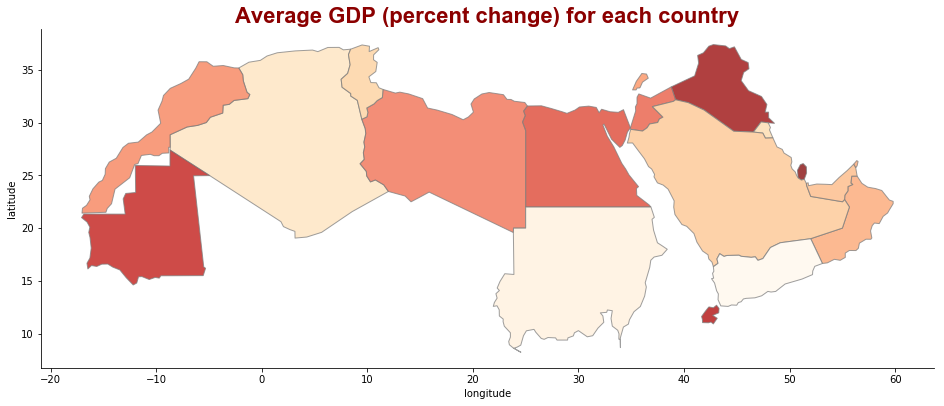

In [167]:
mapp("Average GDP")

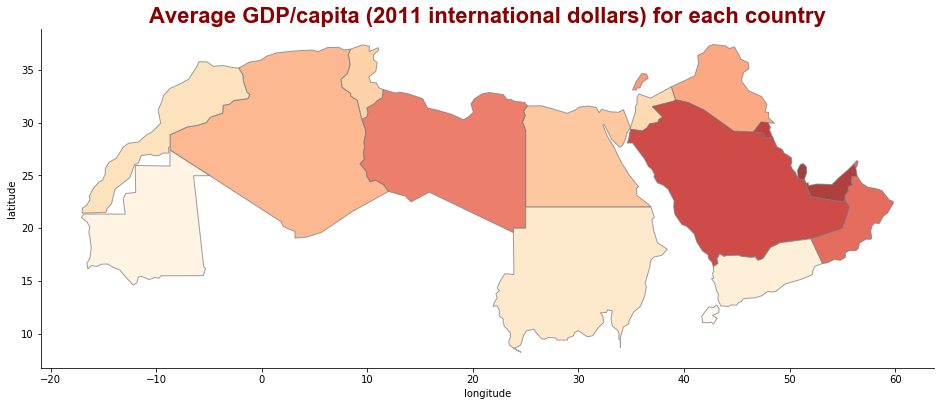

In [168]:
mapp("Average GDP/capita")

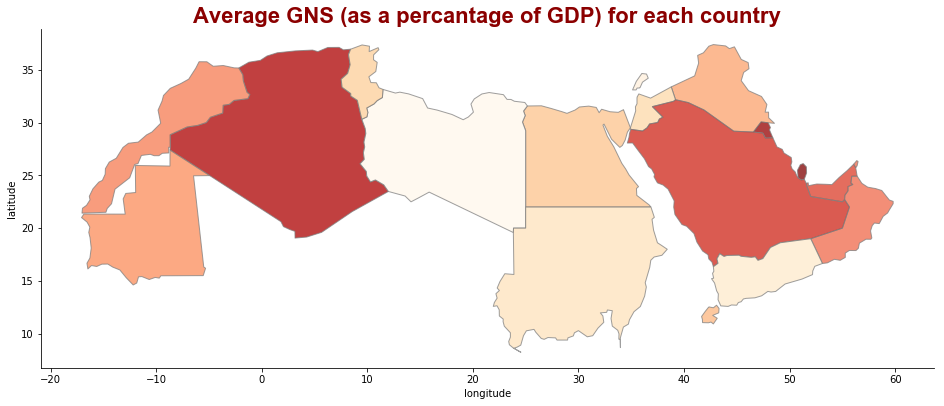

In [169]:
mapp("Average GNS")

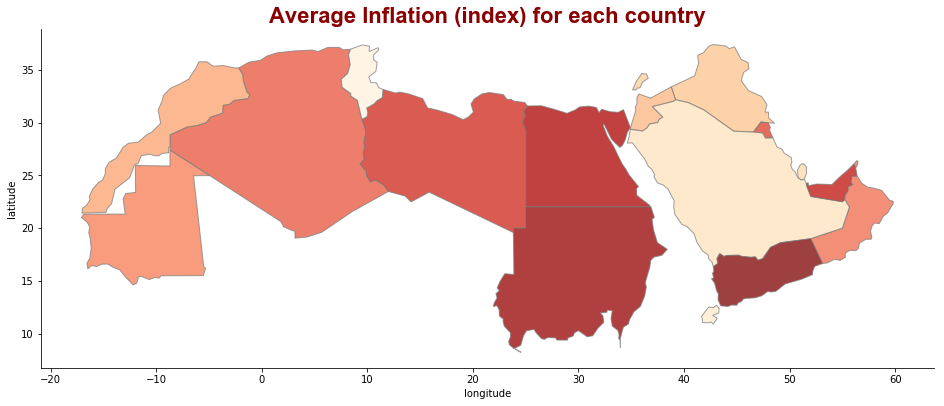

In [170]:
mapp("Average Inflation")

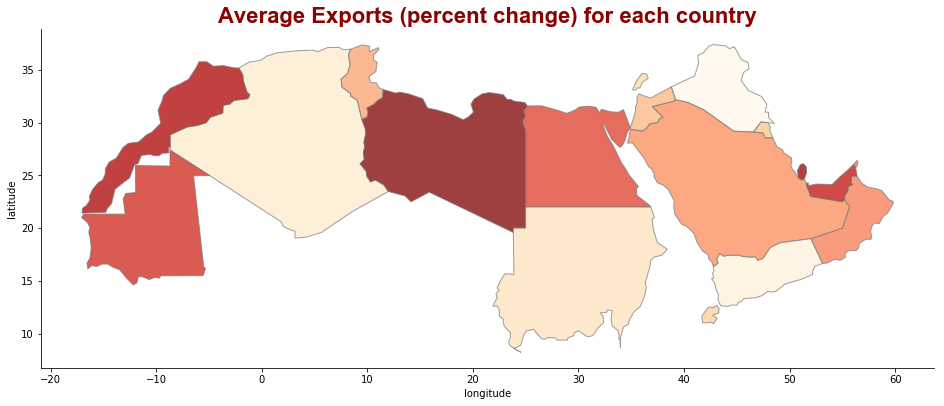

In [171]:
mapp("Average Exports")

As the maps above show, there is a lot of variation in the indicators across different countries. This is why in the following section, we will create seperate graphs for each country in the MENA region.

## Graphing the indicators for each country

In [172]:
a = data.Subject.unique()
a = a.tolist()
a

['Gross domestic product, constant prices',
 'Gross domestic product per capita, constant prices',
 'Gross national savings',
 'Inflation, average consumer prices',
 'Volume of exports of goods and services']

In [173]:
def plots(metric,arab_spring):
    if arab_spring == False:
        metric_data = data.drop( data[ data['Subject'] != metric ].index)
        metric_data = metric_data.drop(["Subject", "Estimates Start After"], axis = 1)
        for item in ["Egypt", "Tunisia", "Yemen", "Bahrain", "Libya"]:
            metric_data.drop( metric_data[ metric_data['Country'] == item ].index , inplace=True)   
        metric_data["ind"] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
        metric_data = metric_data.set_index("ind")
        fig, ax = plt.subplots(nrows = 7, ncols = 2,figsize = (15,35))
        fig.suptitle("%s for non Arab Spring Countries" %metric, fontsize = 24, fontweight = "bold", color = "Navy")
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
        plt.subplots_adjust( hspace=0.5 , wspace = 0.2)
        x = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7]
        y = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
        for item in range(14):
            a = metric_data.loc[item][4:19]
            Country_Metric = a.tolist()
            years = list(metric_data.columns.values[4:19])
            if metric_data["Country"][item] in ["Egypt", "Yemen", "Tunisia", "Libya","Bahrain"]:
                ax[x[item],y[item]].plot(years, Country_Metric, color = "red", linewidth = 3)
            else:
                ax[x[item],y[item]].plot(years, Country_Metric, color = "blue", linewidth = 3)
            ax[x[item],y[item]].set_xlabel("Year", fontsize = 12, color = "Navy")
            ax[x[item],y[item]].set_ylabel("%s"%(metric), fontsize = 12, color = "Navy")
            ax[x[item],y[item]].spines["right"].set_visible(False)
            ax[x[item],y[item]].spines["top"].set_visible(False)
            ax[x[item],y[item]].set_title("%s"%(metric_data["Country"][item]), fontsize = 14, color = "Navy")
            ax[x[item],y[item]].axvline(x=2011, color = "black")  
            ax[x[item],y[item]].text(0.51,0.95,'Arab Spring Starts',transform=ax[x[item],y[item]].transAxes,rotation=90, fontsize = 10)
            ax[x[item],y[item]].grid(which='major', linestyle='-', linewidth='0.4', color='blue')
            ax[x[item],y[item]].minorticks_on()
            ax[x[item],y[item]].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
    else:
        metric_data = data.drop( data[ data['Subject'] != metric ].index)
        metric_data = metric_data.drop(["Subject", "Estimates Start After"], axis = 1)
        for item in ["Jordan", "Algeria", "Djibouti", "Islamic Republic of Iran","Iraq","Kuwait","Lebanon", "Mauritania","Morocco","Oman", "Qatar","Saudi Arabia", "Sudan","United Arab Emirates"]:
            metric_data.drop( metric_data[ metric_data['Country'] == item ].index , inplace=True)   
        metric_data["ind"] = [0,1,2,3,4]
        metric_data = metric_data.set_index("ind")
        fig, ax = plt.subplots(nrows = 3, ncols = 2,figsize = (15,20))
        fig.suptitle("%s for Arab Spring Countries" %metric, fontsize = 24, fontweight = "bold", color = "Navy")
        fig.tight_layout()
        fig.subplots_adjust(top=0.93)
        plt.subplots_adjust( hspace=0.5 , wspace = 0.2)
        x = [0,0,1,1,2]
        y = [0,1,0,1,0]
        
        for item in range(5):
            a = metric_data.loc[item][4:19]
            Country_Metric = a.tolist()
            years = list(metric_data.columns.values[4:19])
            if metric_data["Country"][item] in ["Egypt", "Yemen", "Tunisia", "Libya","Bahrain"]:
                ax[x[item],y[item]].plot(years, Country_Metric, color = "red", linewidth = 3)
            else:
                ax[x[item],y[item]].plot(years, Country_Metric, color = "blue", linewidth = 3)
            ax[x[item],y[item]].set_xlabel("Year", fontsize = 12, color = "Navy")
            ax[x[item],y[item]].set_ylabel("%s"%(metric), fontsize = 12, color = "Navy")
            ax[x[item],y[item]].spines["right"].set_visible(False)
            ax[x[item],y[item]].spines["top"].set_visible(False)
            ax[x[item],y[item]].set_title("%s"%(metric_data["Country"][item]), fontsize = 14, color = "Navy")
            ax[x[item],y[item]].axvline(x=2011, color = "black")  
            ax[x[item],y[item]].text(0.51,0.95,'Arab Spring Starts',transform=ax[x[item],y[item]].transAxes,rotation=90, fontsize = 10)
            ax[x[item],y[item]].grid(which='major', linestyle='-', linewidth='0.4', color='blue')
            ax[x[item],y[item]].minorticks_on()
            ax[x[item],y[item]].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.show()

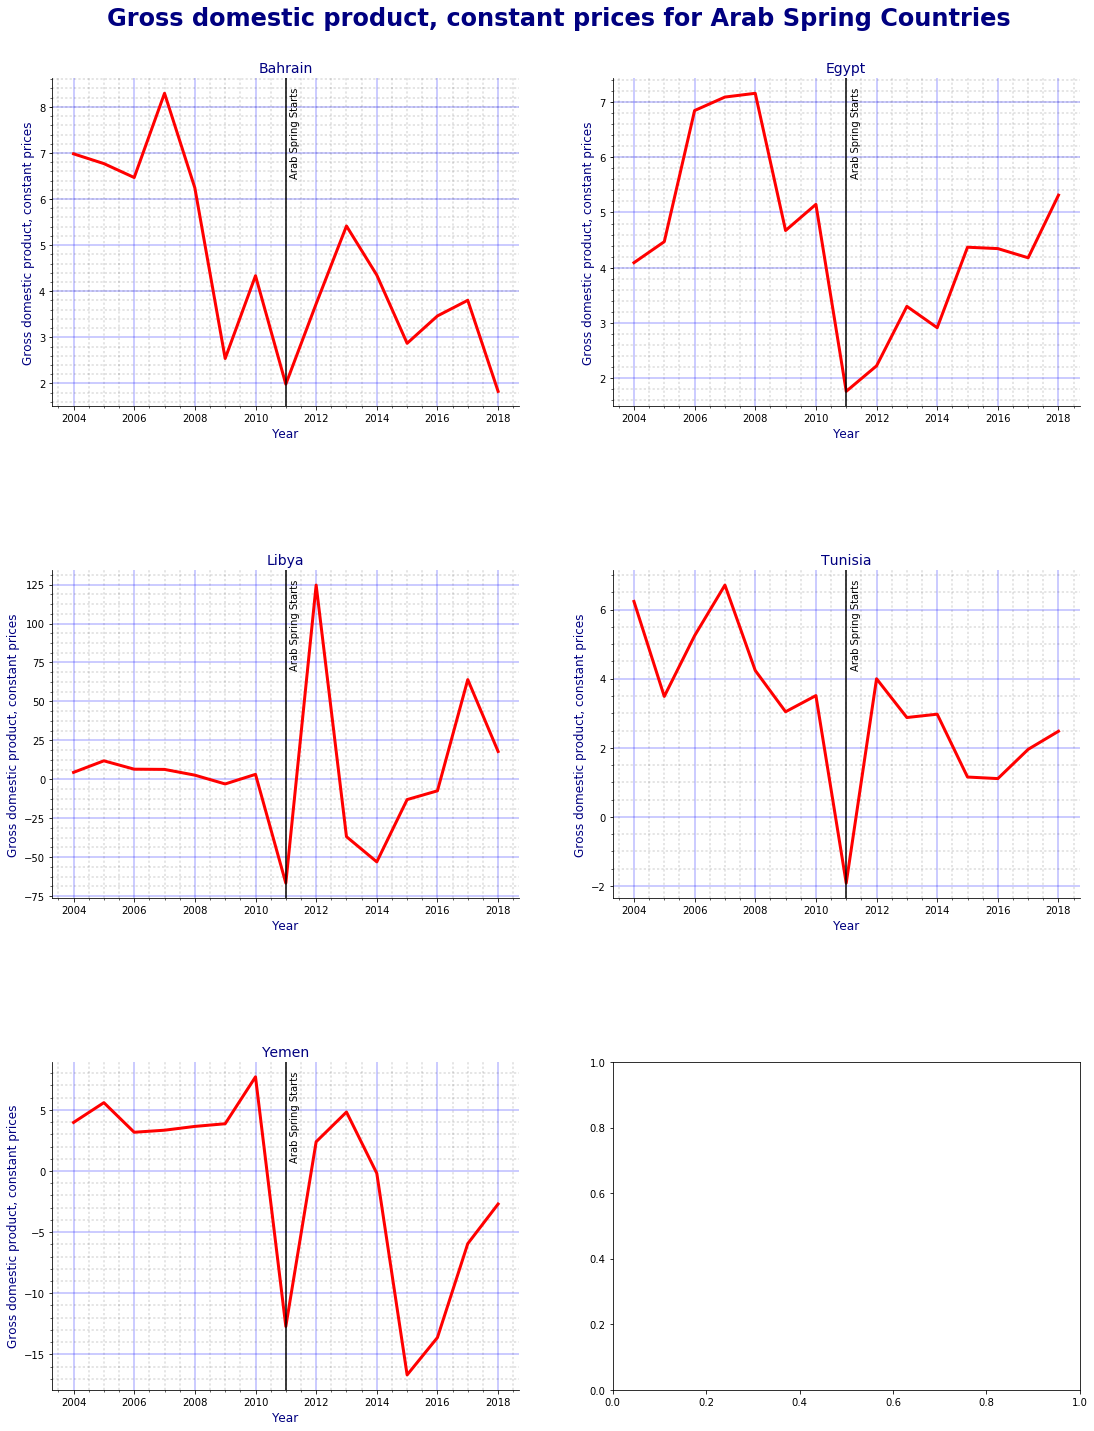

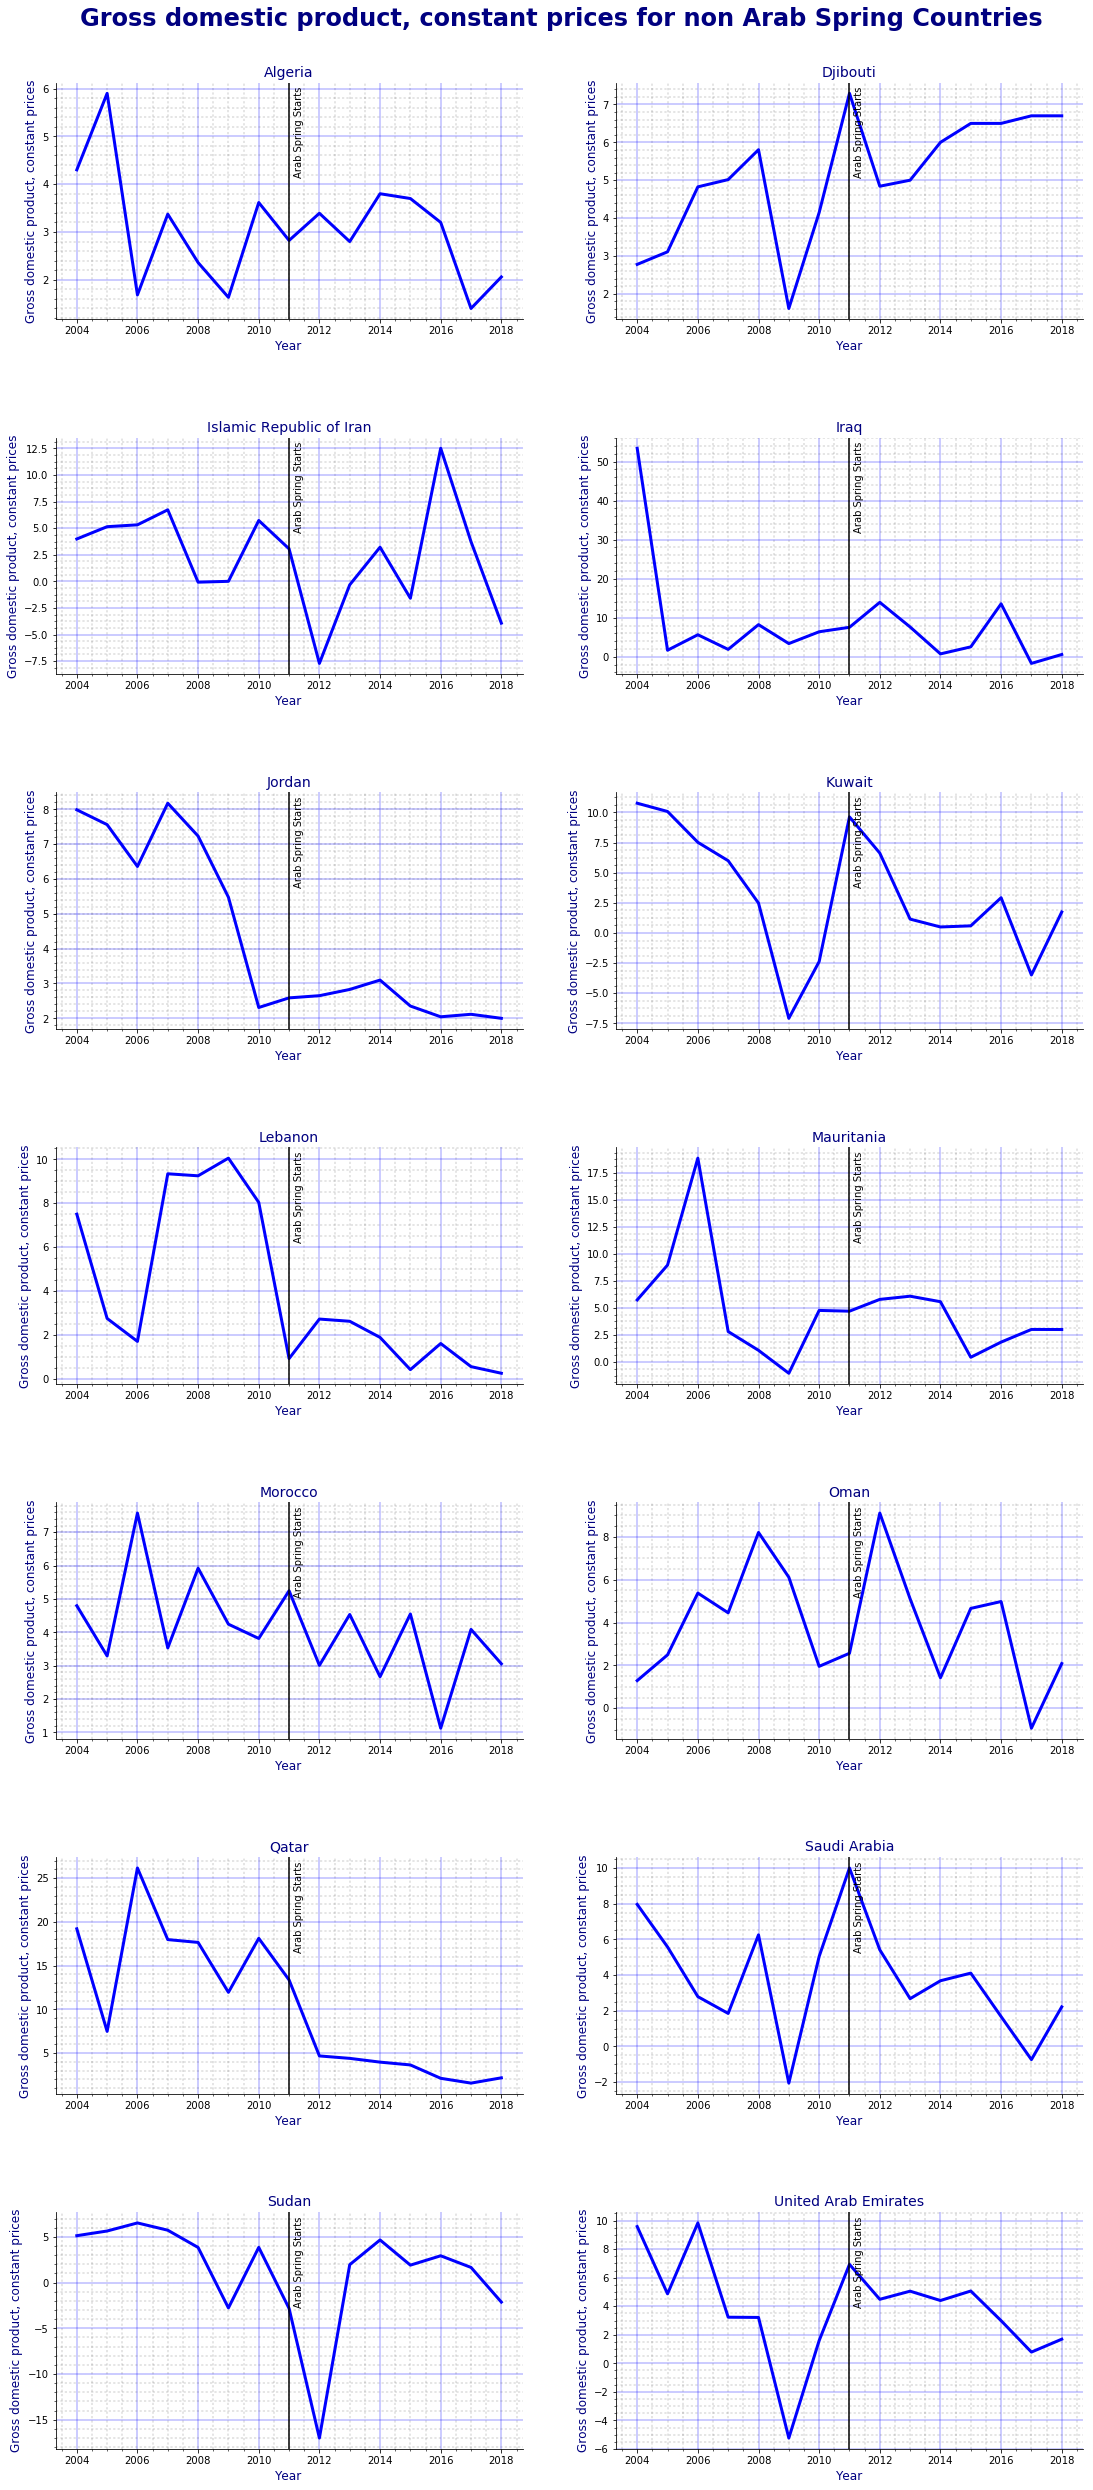

In [174]:
for item in [True, False]:
    plots(a[0], item)
plt.show()

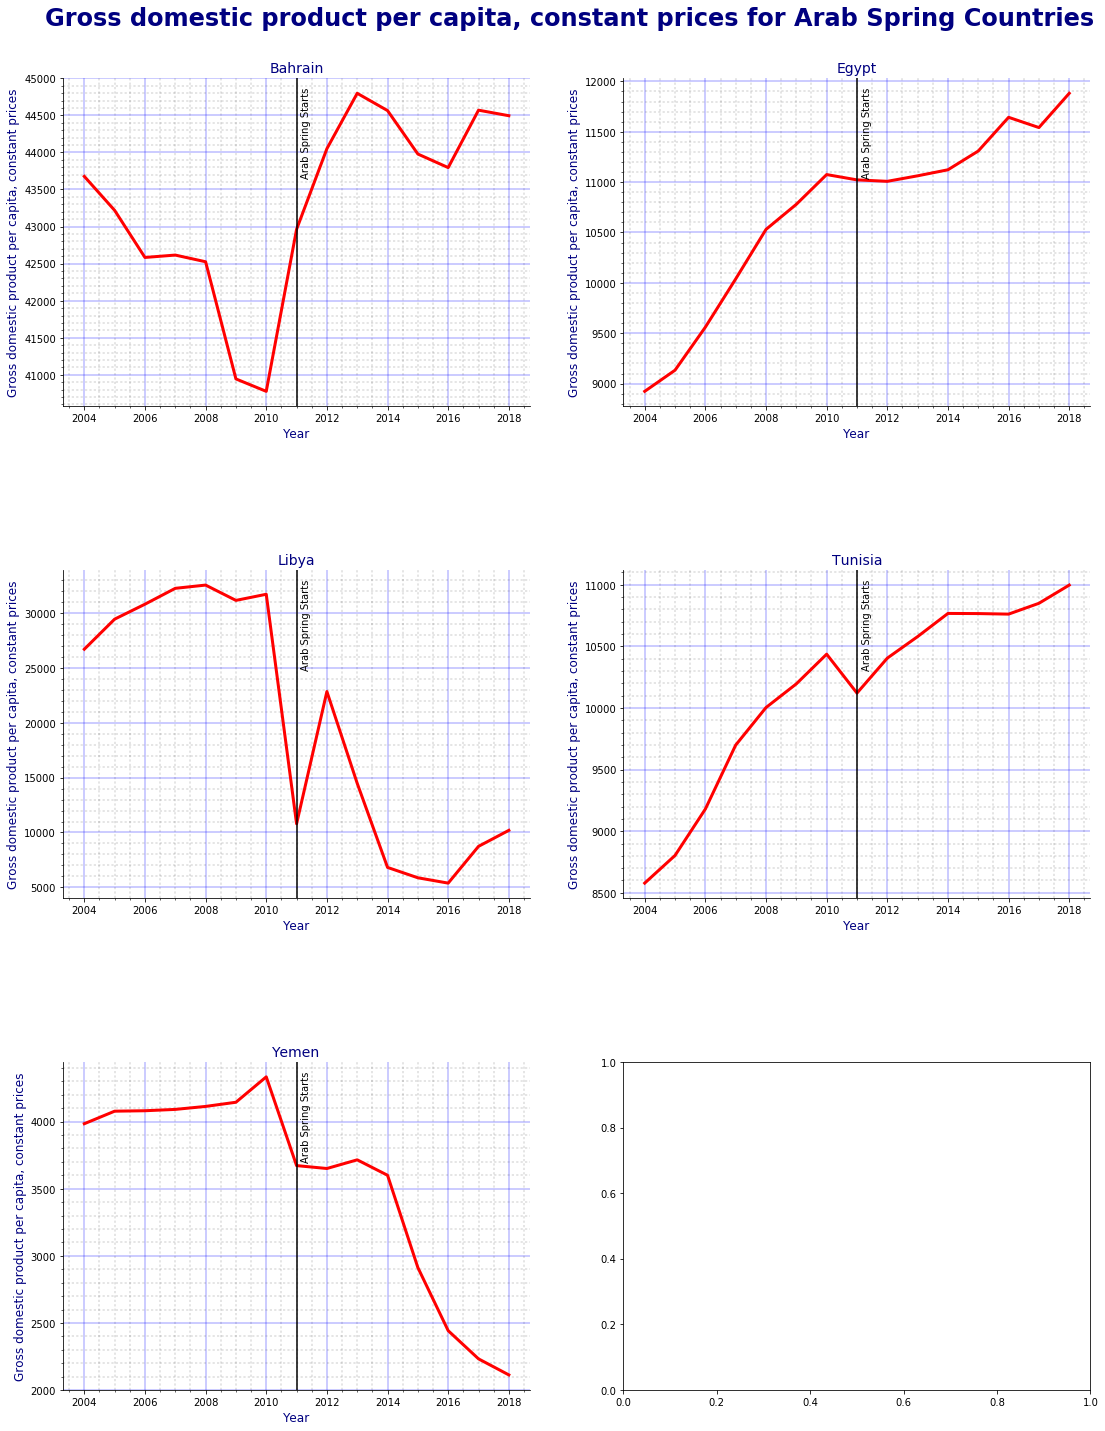

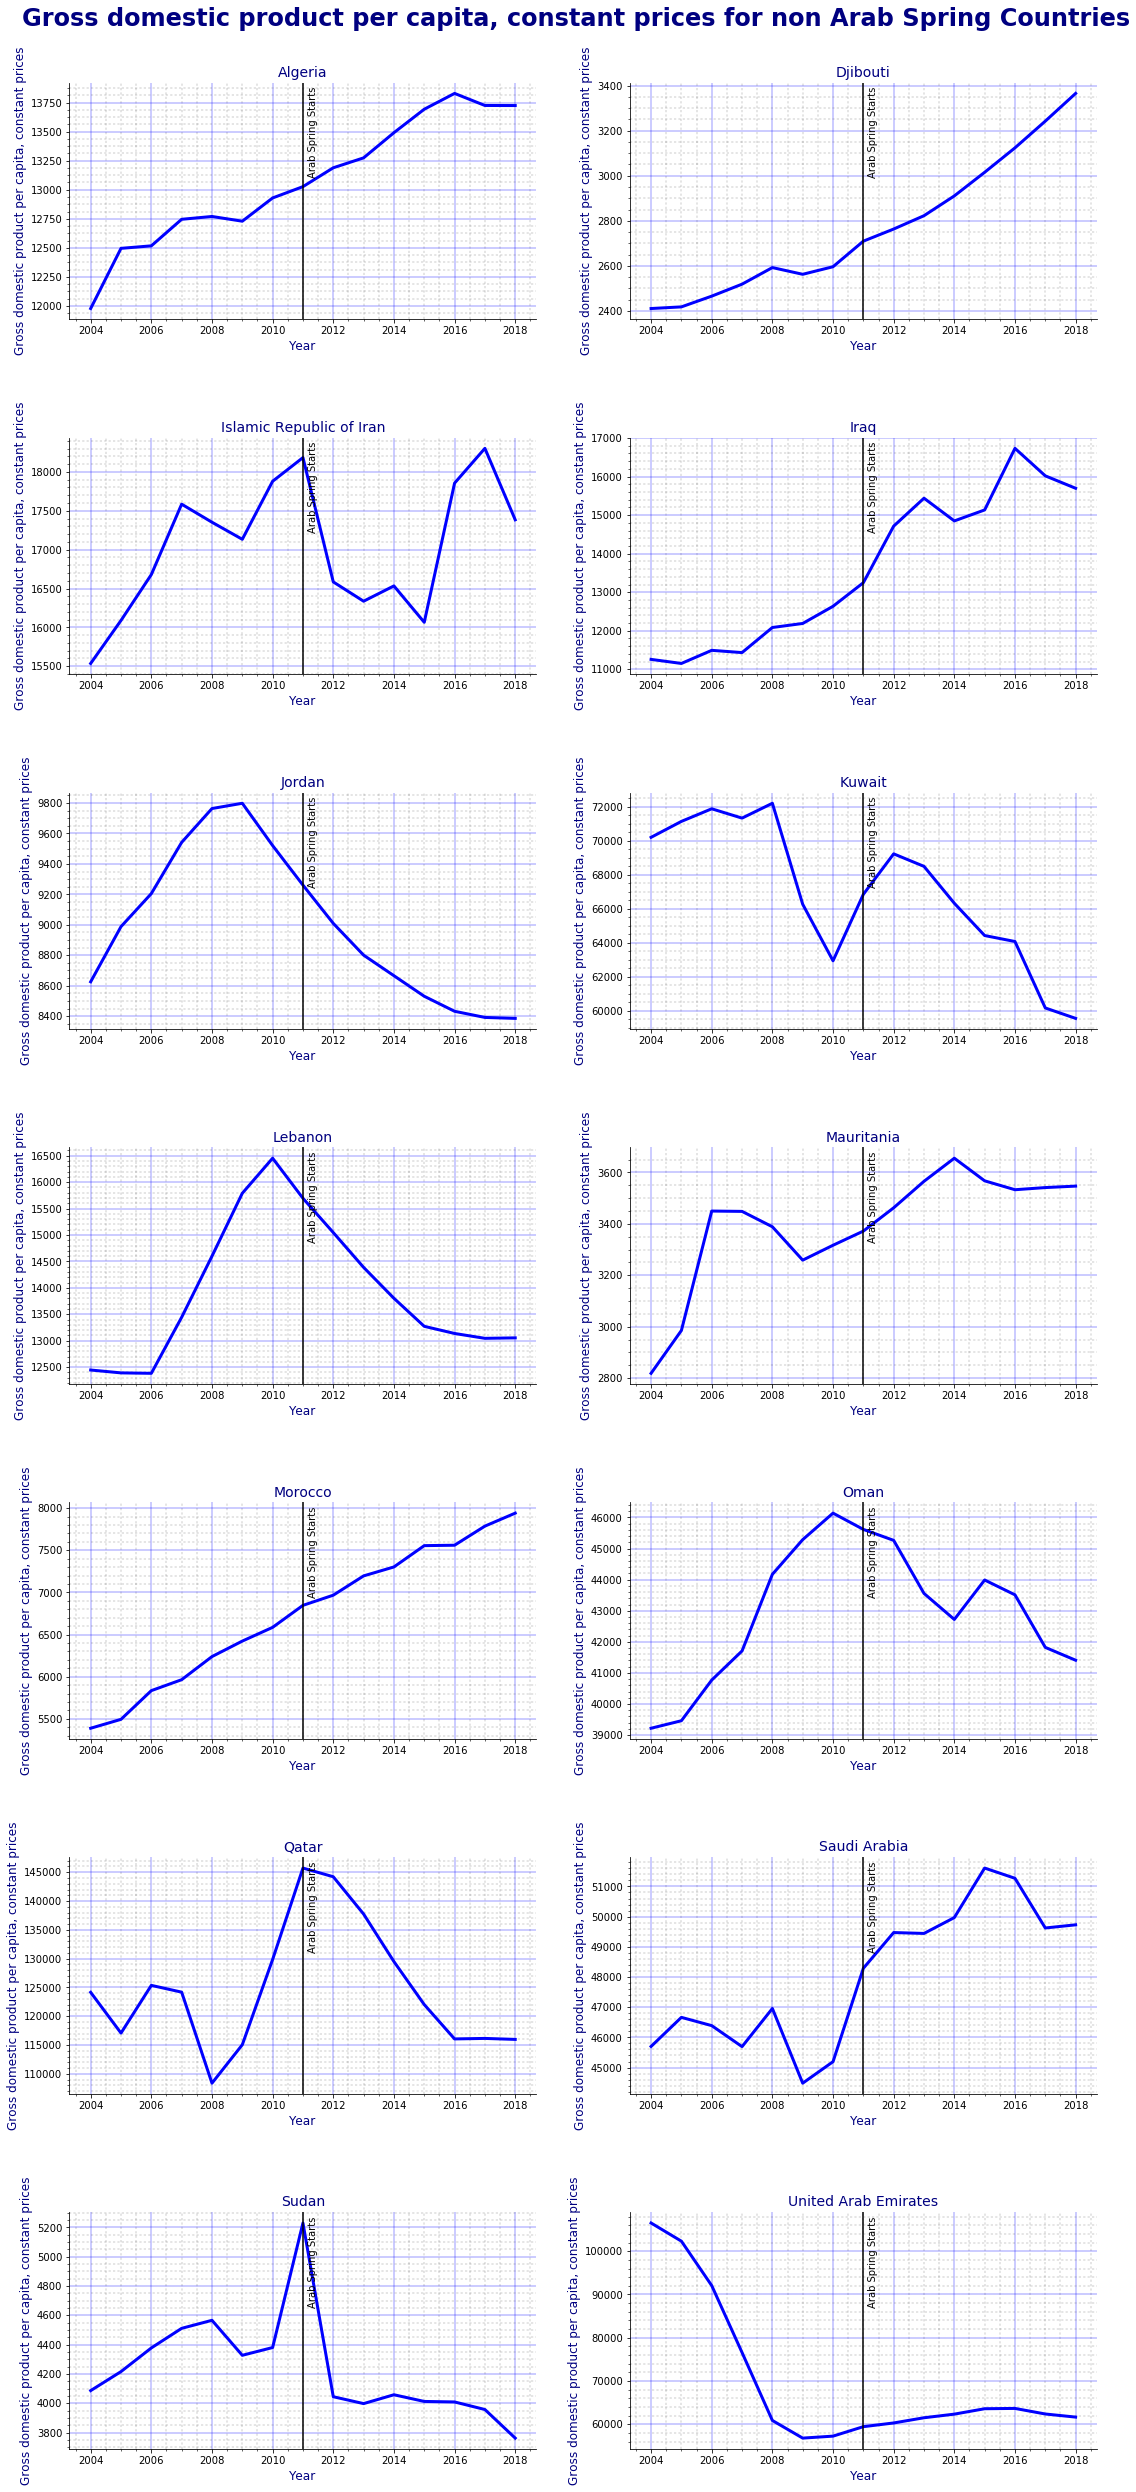

In [175]:
for item in [True, False]:
    plots(a[1], item)
plt.show()

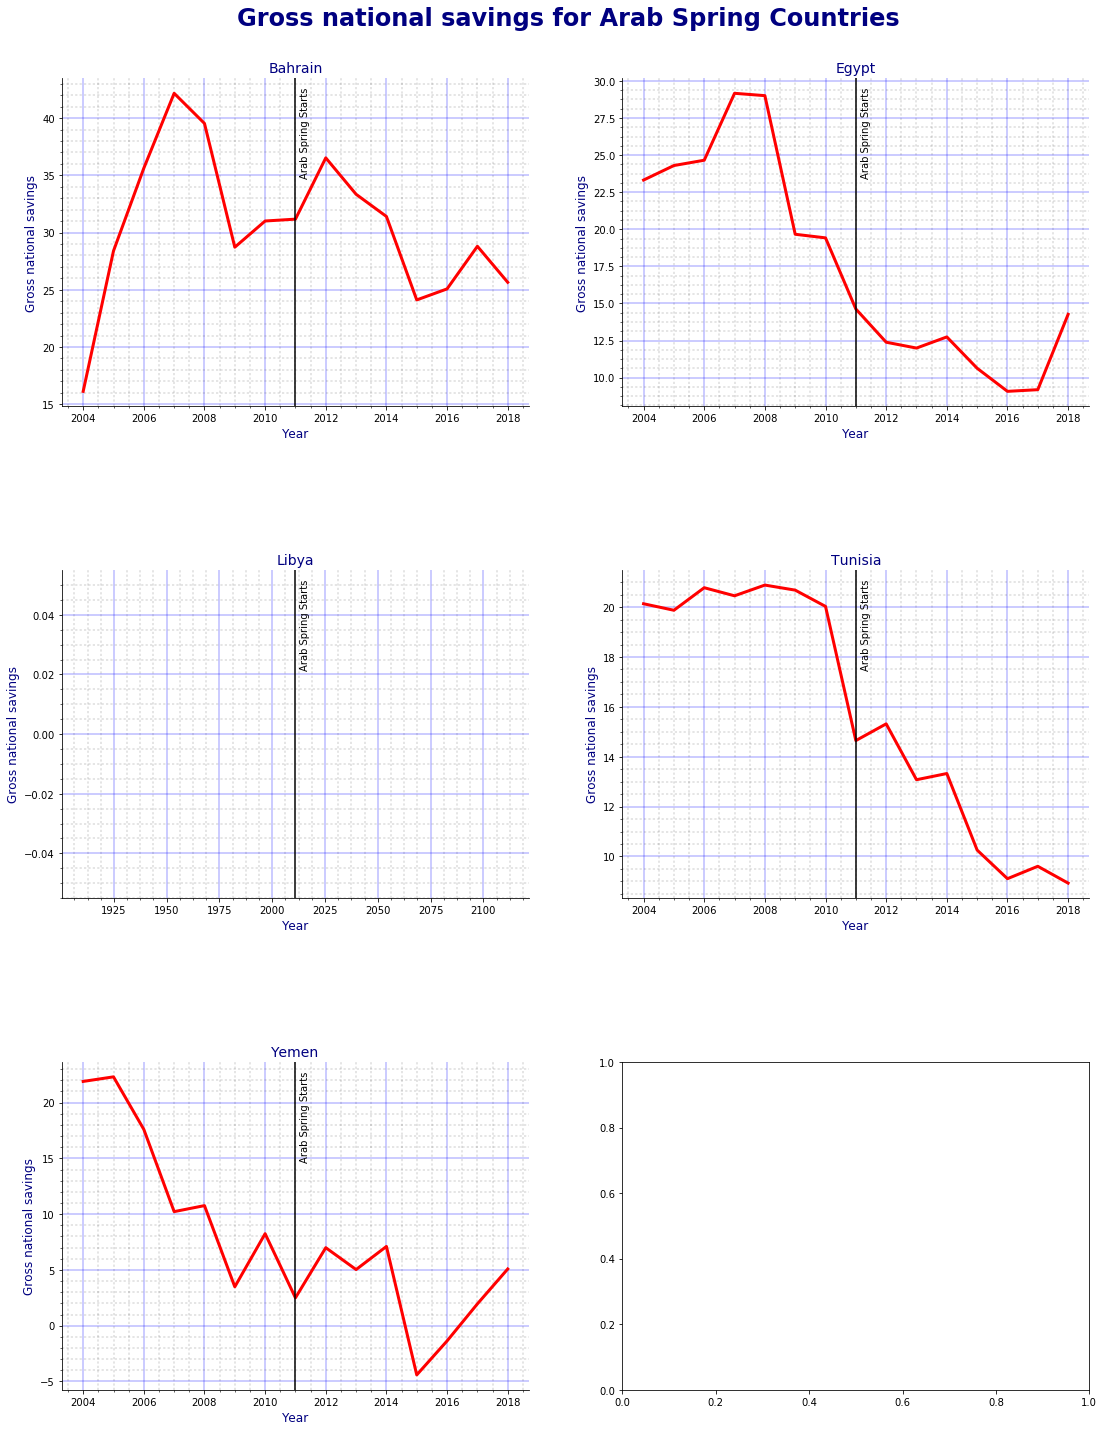

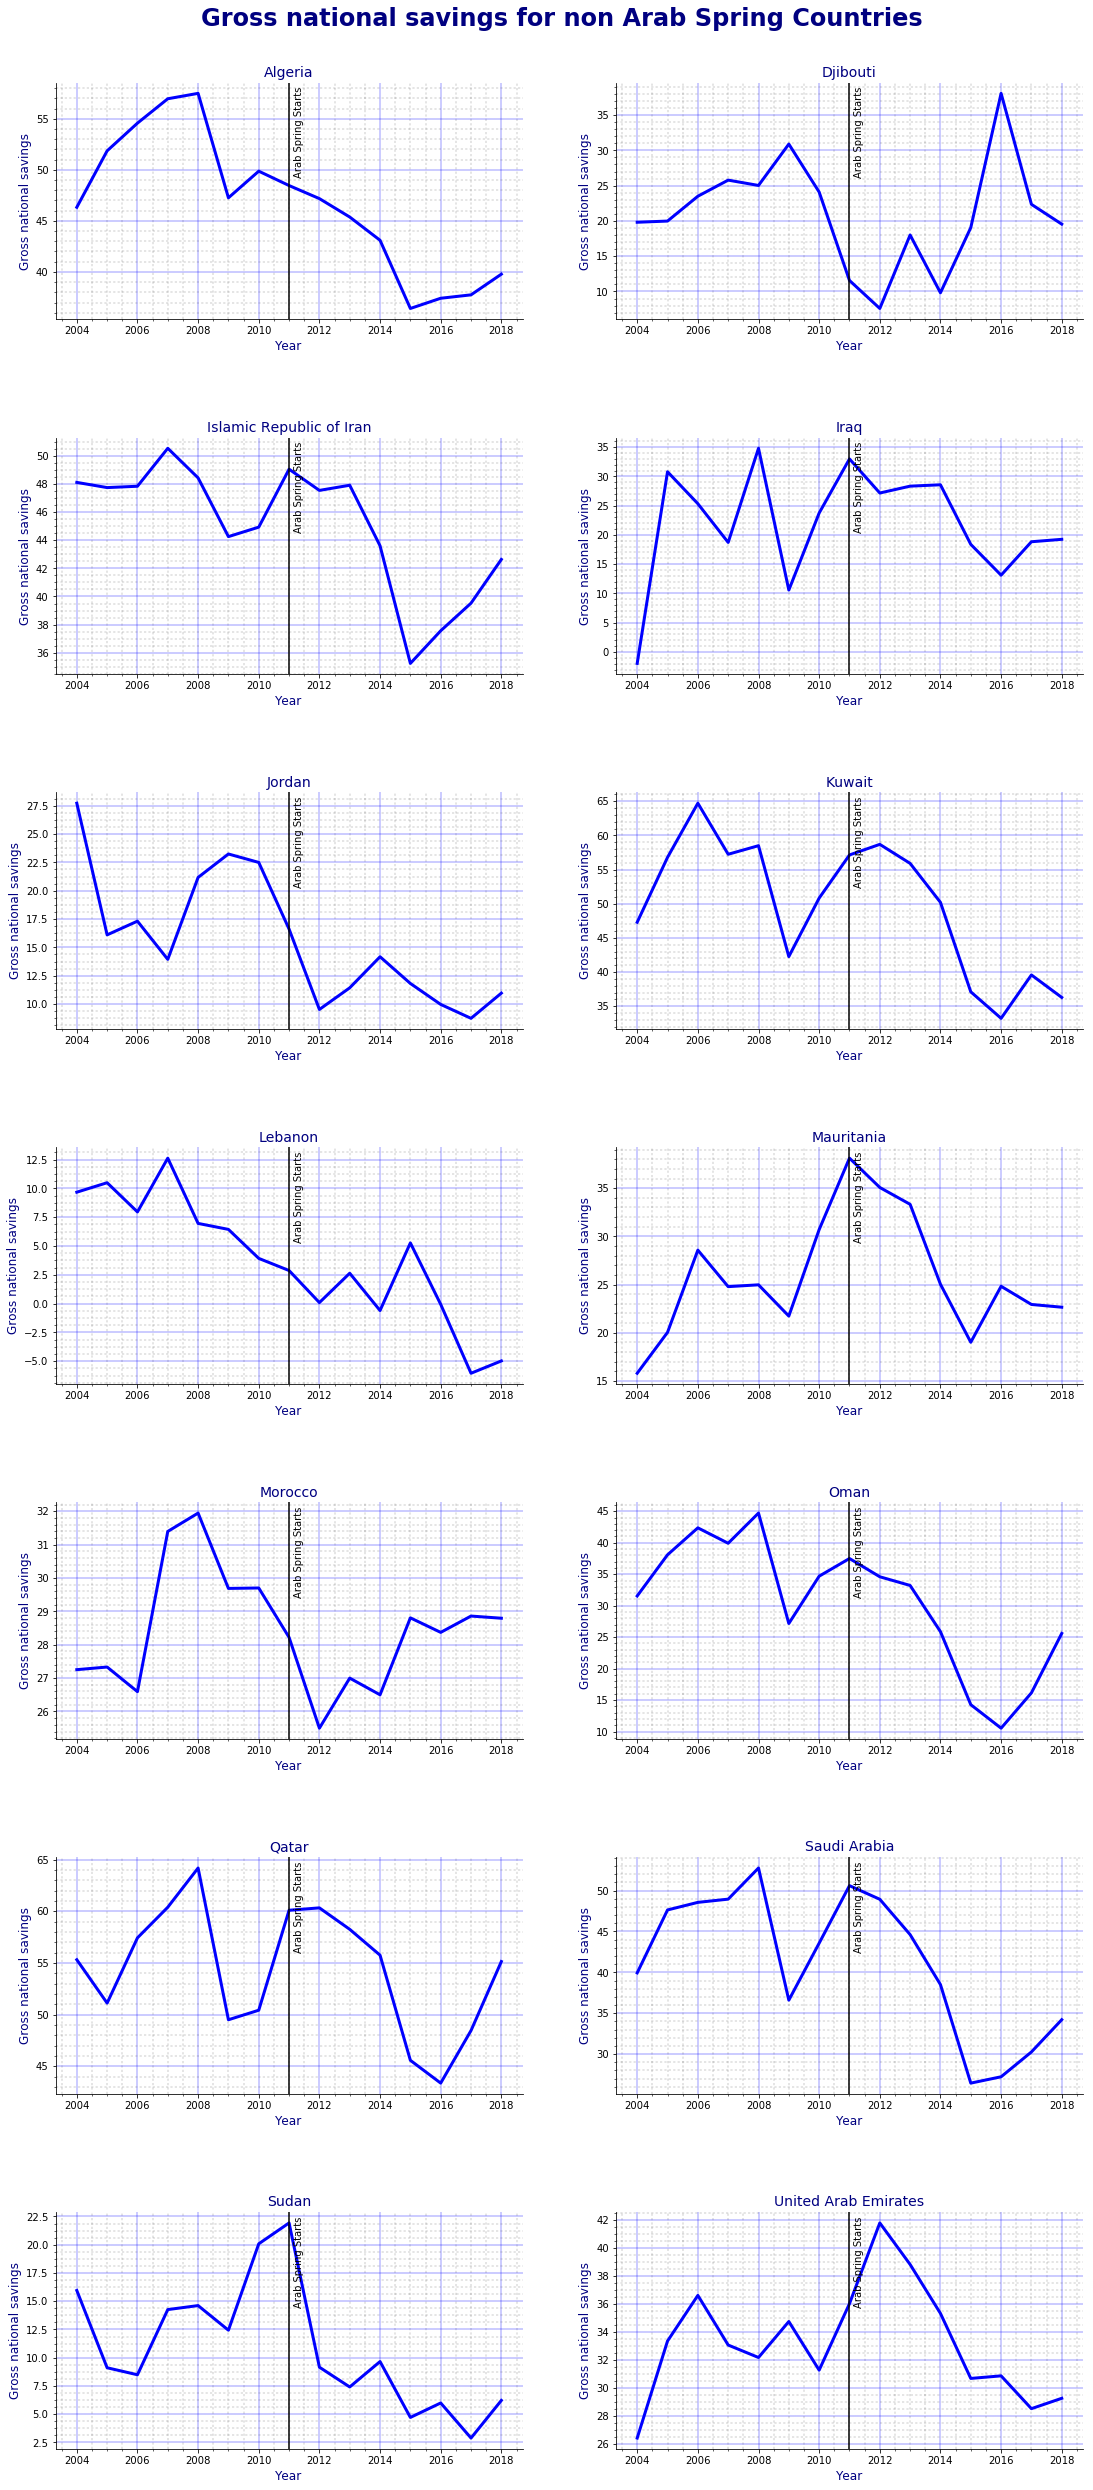

In [176]:
for item in [True, False]:
    plots(a[2], item)
plt.show()

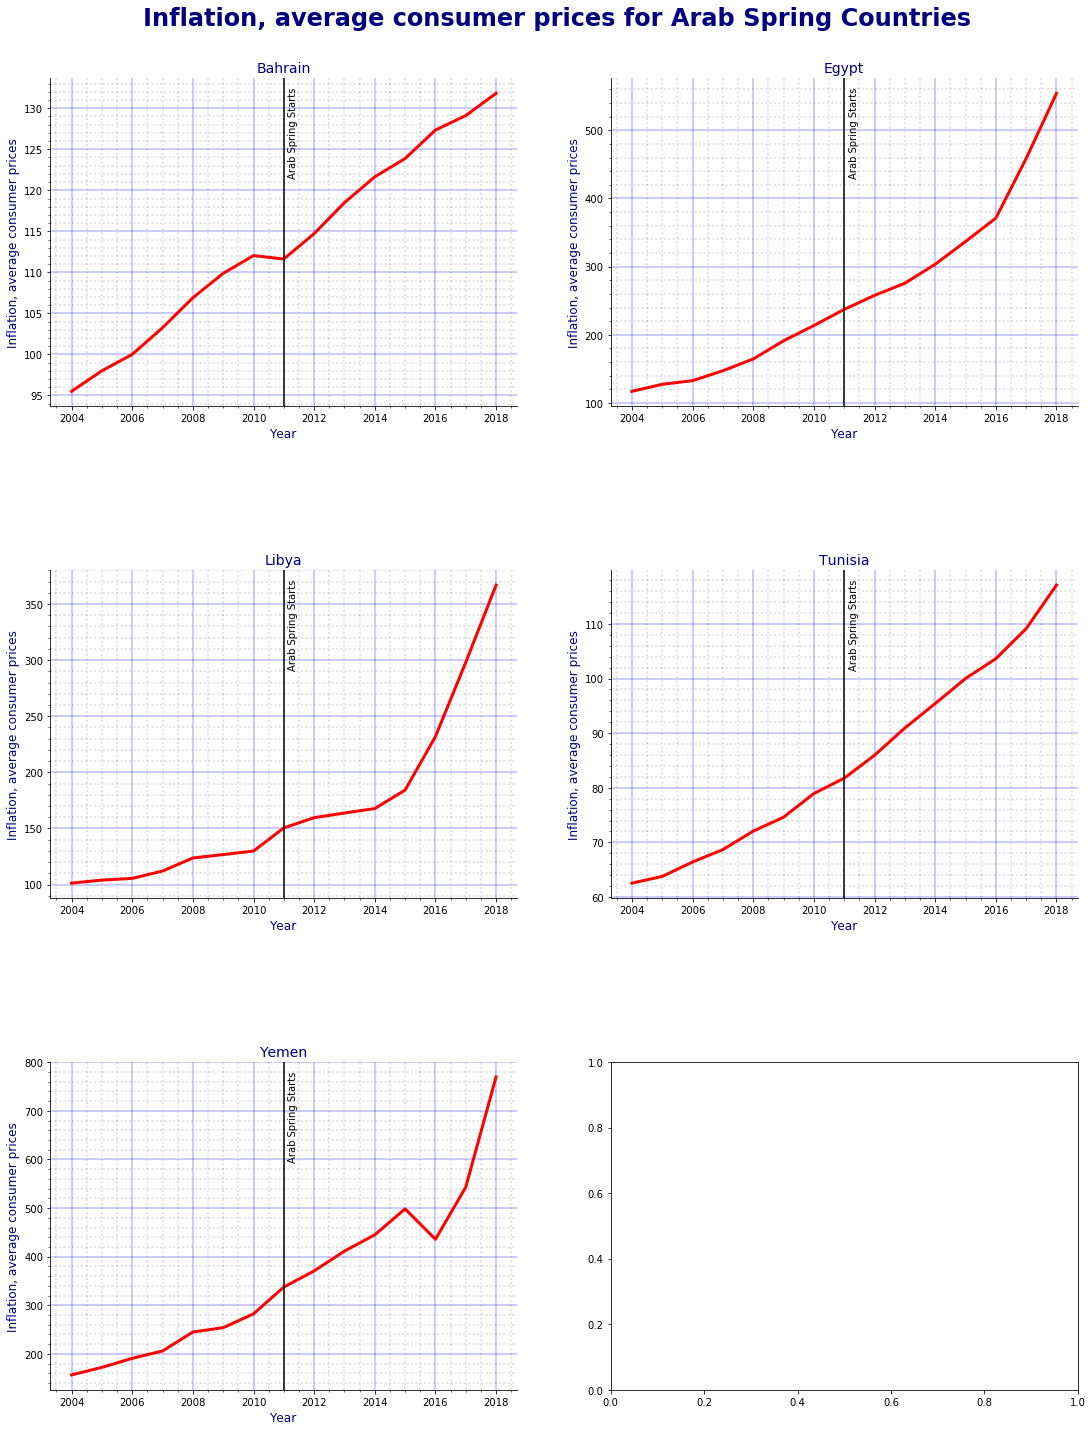

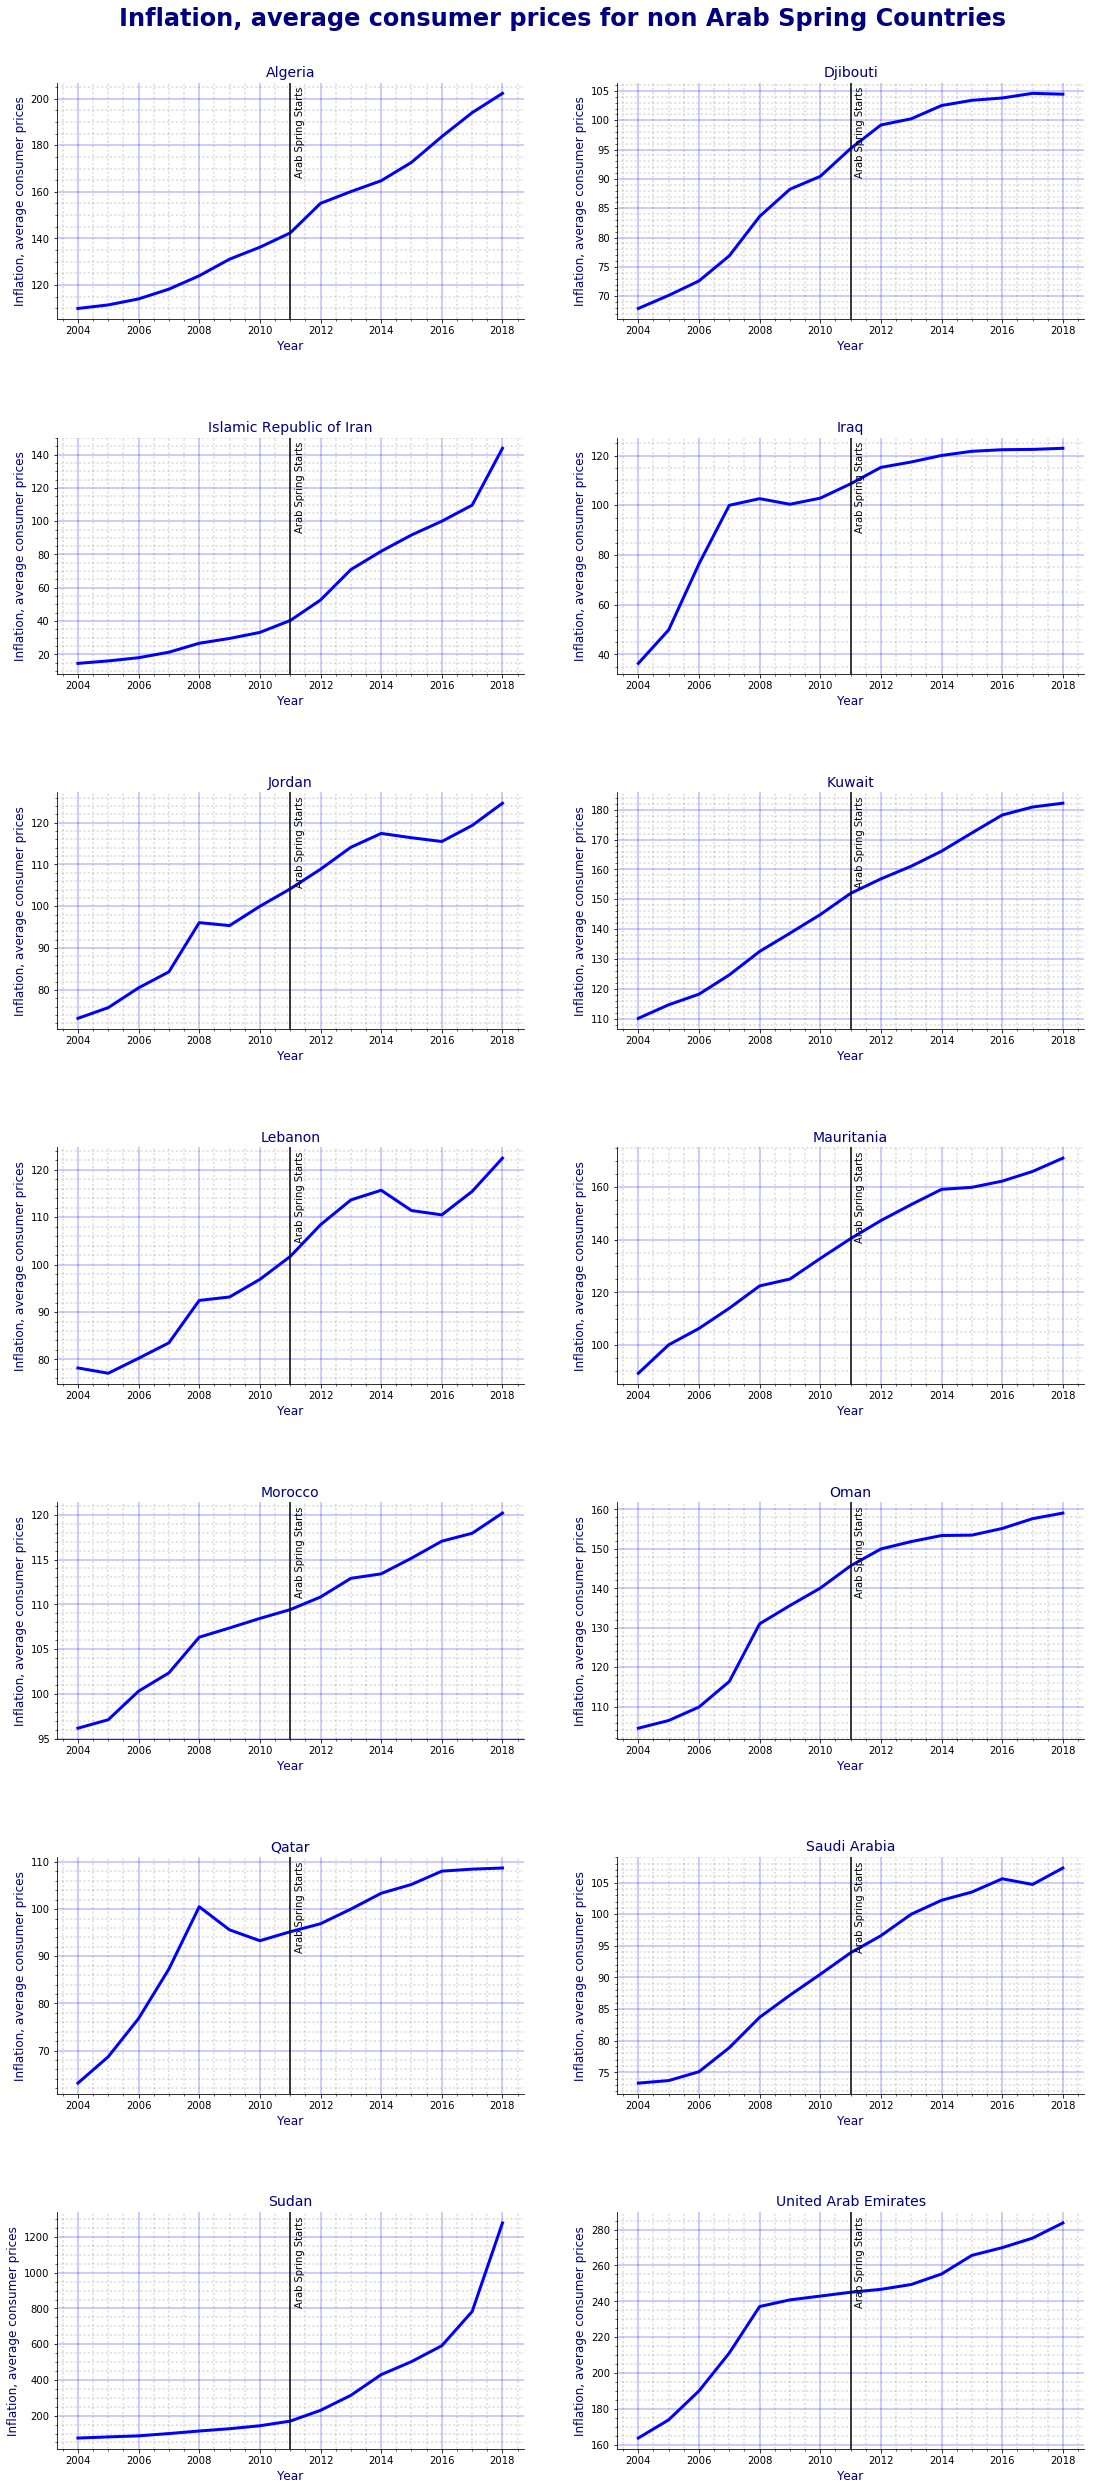

In [177]:
for item in [True, False]:
    plots(a[3], item)
plt.show()

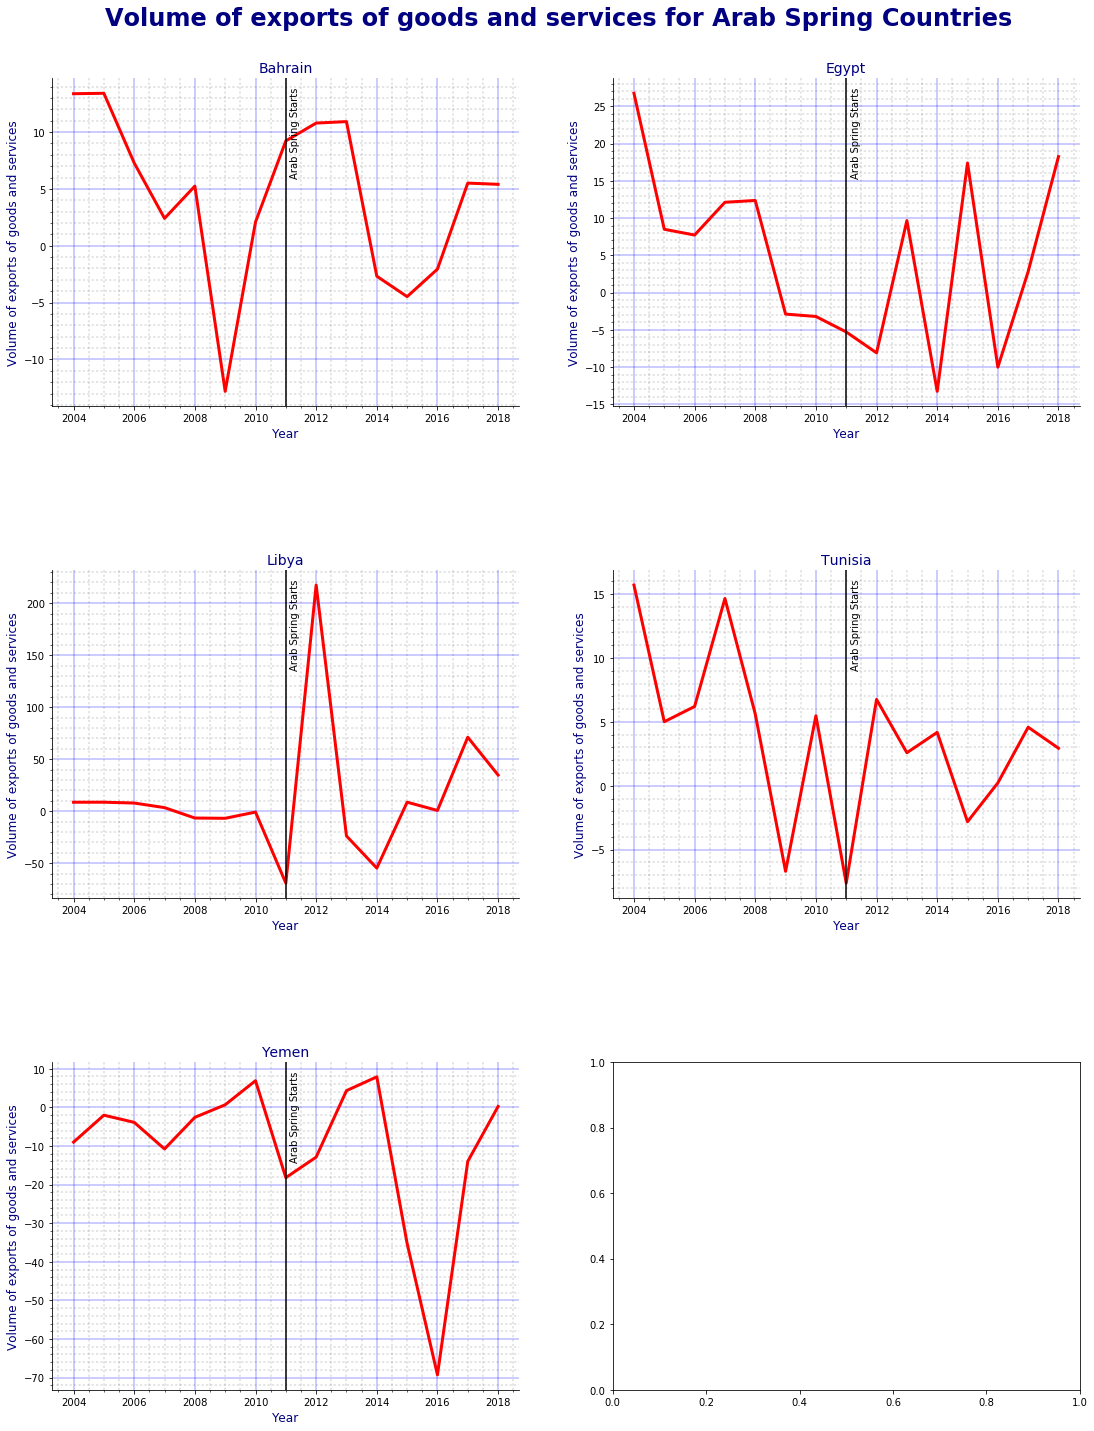

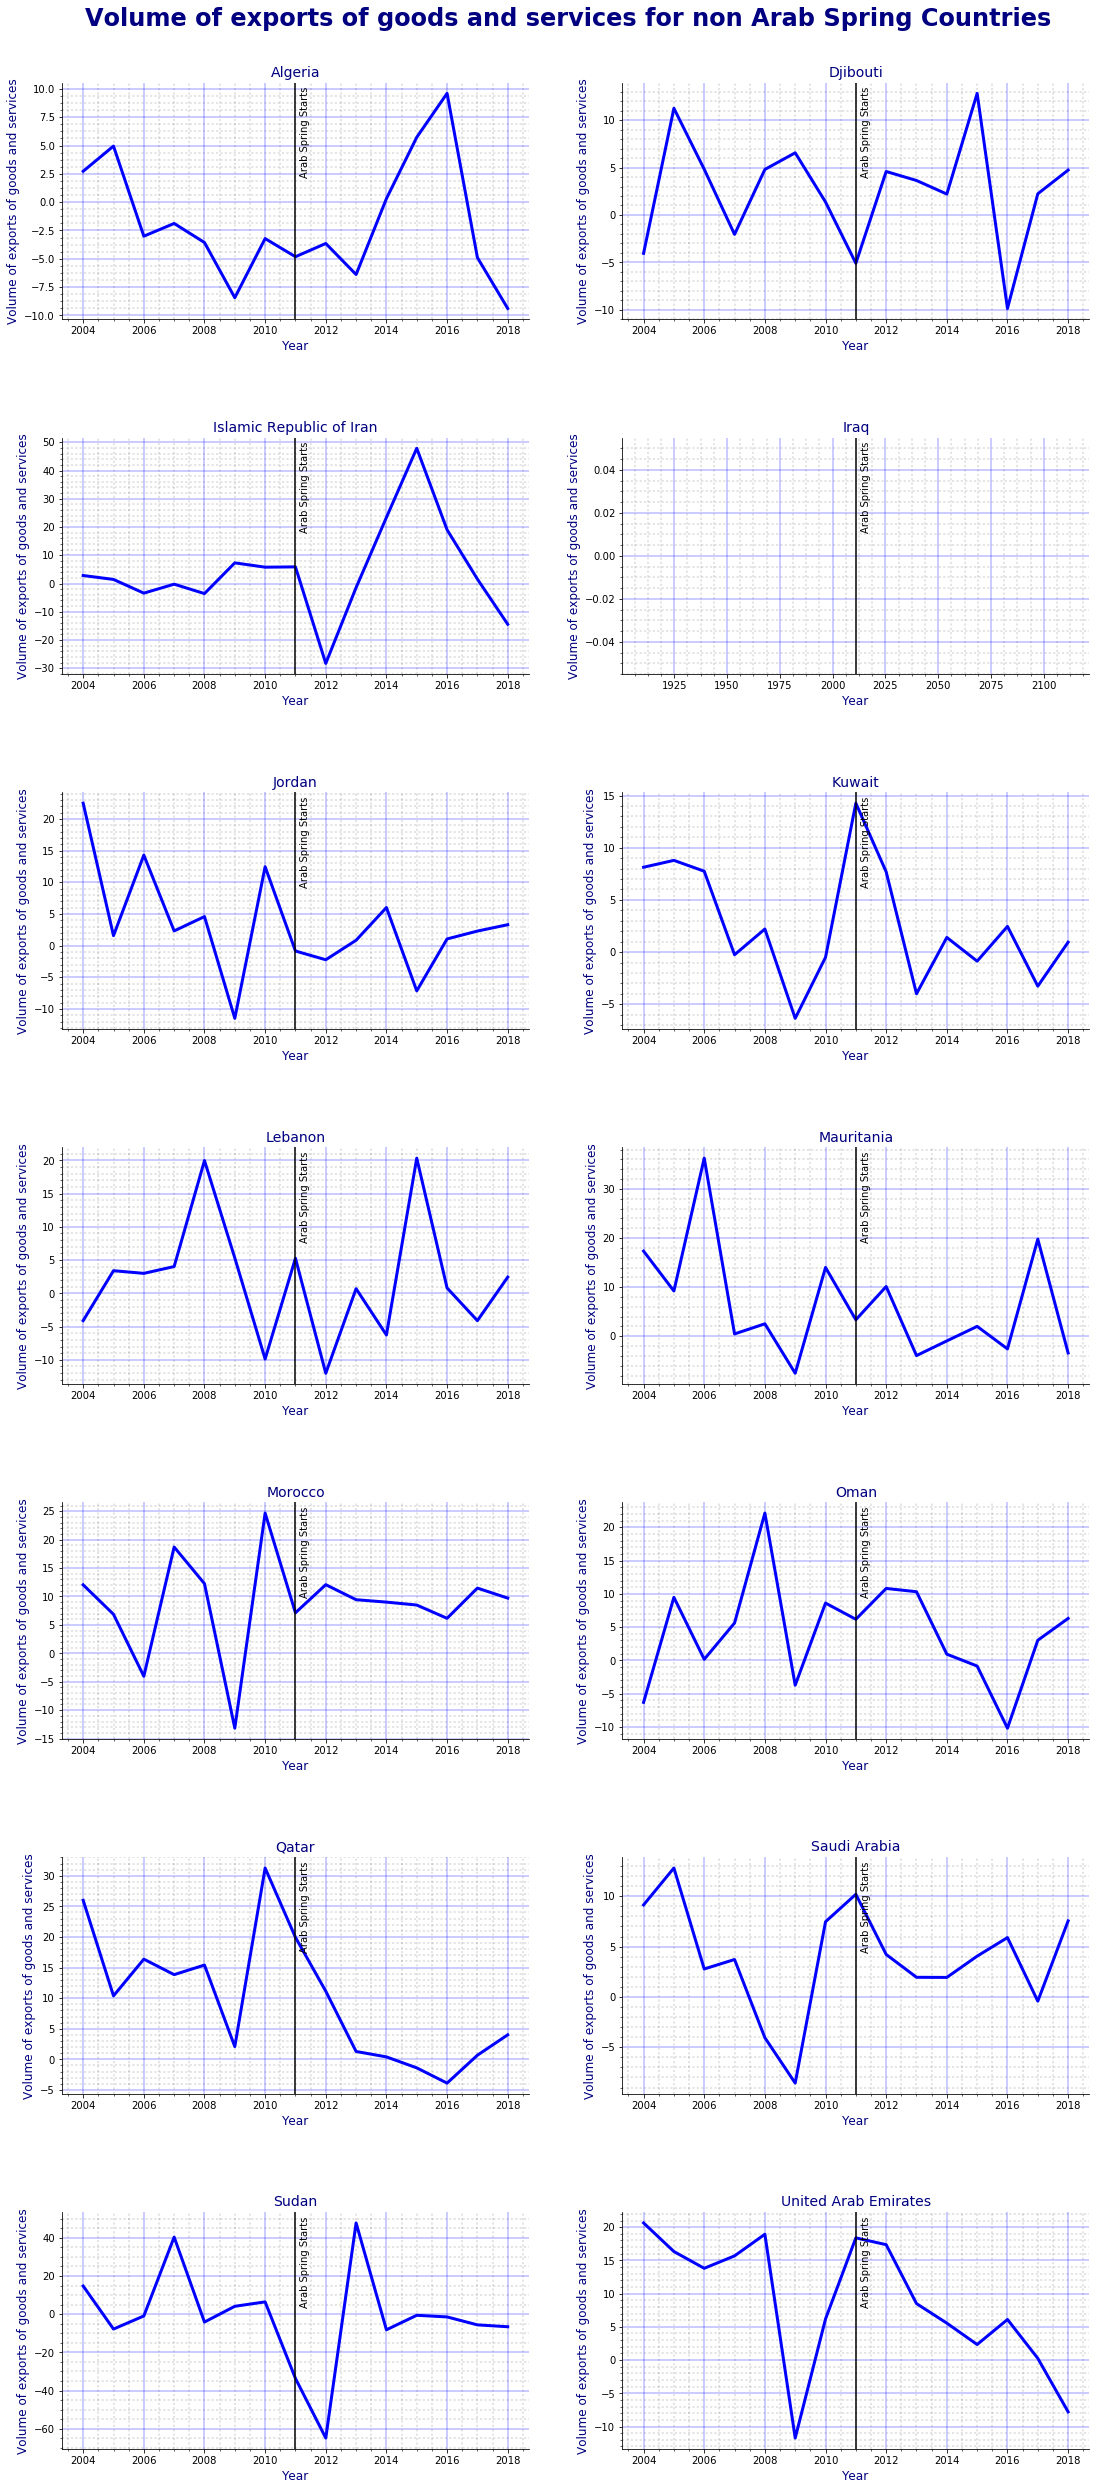

In [178]:
for item in [True, False]:
    plots(a[4], item)
plt.show()

#### Comments on the graphs:

GDP: The data shows that there was a sizable decrease in GDP in the year leading up to the Arab Spring for all countries that had protests. This drop in GDP is then followed by a similarly sizable increase in GDP in 2012. There doesn't seem to be any obvious trends for all non Arab Spring countries. However, It is interesting to note that there was a fall in GDP between 2011 and 2012 for all GCC countries.

GDP/capita: GDP/capita tells a somewhat similar story for Arab Spring and GCC countries. The changes, however, seem to be less drastic. The only exception seems to be Bahrain, where GDP/Capita was actually on the rise before.

GNS: It seems that GNS as a percentage of GDP has been falling in the years leading up to the Arab Spring in the countries that had major protests. It seems to be a general trend, however, in all Arab countries that GNS as a percentage of GDP has been on the decline, with a few exceptions (e.g Iraq and Djibouti).

Inflation: Inflation level is constantly increasing. Nothing is particularly special about the year 2011.

Exports: There is constant fluctuation in the percentage change of exports. However, it seems that exports fell for all Arab Spring Countries between 2010 and 2011, with the exception of Bahrain. It also seems like exports fell for a lot of non-Arab-Spring countries right after 2011. However, given how exports have been fluctuating before and after 2011, it is hard to say that this was a direct result of the Arab Spring.

## Conclusion

The project aims to show the different ways in which the MENA region has been affected by the Arab Spring. 

The visualizations show us that no generalizations can be made regarding the Arab Spring, as it had very different effects on different countries. They also show how the Arab Spring has had major effects on the countries that did not have revolts, which is quite interesting.